Interferons (IFNs) are antiviral cytokines that play a key role in the innate immune response to viral infections.
In response to stimuli --> cells produce interferon to act on the neighbouring cells




IFN goal:
1. warn uninfected cells of an approaching virus and thereby allow them to establish a defensive state before being infected
2. promoting inflammatory
3. increasing antigen presentation in an MHC I context


ISGs (interferon-stimulated genes) = genes induced by IFN signaling
1. antiviral effector --> targetting the virus
2. positive regulators --> enhancing recognition or innate immune signaling
3. negative regulators --> help with terminating signaling (USP18)



In [ ]:
#!pip install decoupler
#!pip install scanpy
import decoupler as dc
import pandas as pd


# prompt: filter regulons dataframe where source equal to something in a list like ["STAT1","STAT2"]


In [ ]:
#!pip install --upgrade decoupler

In [80]:
def obtainingregulon(list_reg):
  regulons = dc.op.collectri(organism='human')
  filtered_regulons = regulons[regulons['source'].isin(list_reg)]
  return filtered_regulons

lista=[
      "GTF2I",
      "GTF3A"
      "NRF1",
      "ELF1",
      "STAT1",
      "STAT2",
      "IRF9",
      "STAT3",
      "STAT4",
      "STAT5A",
      "STAT5B",
      "IRF3",
      "IRF7",
      "IRF1",
      "IRF5",
"IRF8",
     ]

filtered_regulons=obtainingregulon(lista)


weight
 1.0    2855
-1.0     187
Name: count, dtype: int64

In [81]:
def averagingdf(dframe):
  avgeraged = dframe.groupby(['tf', 'gene',"cond"], as_index=False).agg(
      wei=('wei', 'mean'),
      wei_std=('wei', 'std'))
  return avgeraged

In [ ]:
import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
table=pd.read_csv("/content/drive/MyDrive/vega_weights_default_mu_clamp.csv", sep = "\t")
table_swa=pd.read_csv("/content/drive/MyDrive/vega_weights_SWA.csv", sep = "\t")

avg_df=averagingdf(table)

avg_df_swa=averagingdf(table_swa)

In [89]:
david

iteration,tf,gene,wei_control,STD_control,wei_stimulated,STD_stimulated
0     0,STAT5A,Gene_0,0.001493998,0.02537019,0.00191...                     
1     0,STAT5B,Gene_1,0.00426848,0.024786815,0.00041...                     
2     0,STAT4,Gene_2,0.007840813,0.026427433,0.00981...                     
3     0,IRF1,Gene_3,-0.002693133,0.025590008,0.00282...                     
4     0,STAT3,Gene_4,-0.002903055,0.0240658,-0.00179...                     
...                                                 ...                     
6387  0,TF_16,Gene_371,-0.006682659,0.028890267,-0.0...                     
6388  0,TF_16,Gene_372,0.002616102,0.029621484,0.007...                     
6389  0,TF_16,Gene_373,-0.004939612,0.031459741,-0.0...                     
6390  0,TF_16,Gene_374,-0.009731514,0.02962683,-0.01...                     
6391  0,TF_16,Gene_375,-0.007181771,0.029467279,0.00...                     

[6392 rows x 1 columns]

In [90]:
david=pd.read_csv("/content/drive/MyDrive/weights.csv", sep = ",")
# Riorganizza usando melt
david_melted = pd.melt(
    david,
    id_vars=['tf', 'gene'],
    value_vars=['wei_control', 'STD_control', 'wei_stimulated', 'STD_stimulated'],
    var_name='measure',
    value_name='value'
)

# Estrai 'cond' e 'tipo' (wei o std) dalle colonne originali
david_melted['cond'] = david_melted['measure'].apply(lambda x: 'control' if 'control' in x else 'stimulated')
david_melted['tipo'] = david_melted['measure'].apply(lambda x: 'wei' if 'wei' in x else 'wei_std')

# Pivota di nuovo per ottenere le colonne finali
df_final = david_melted.pivot_table(
    index=['tf', 'gene', 'cond'],
    columns='tipo',
    values='value'
).reset_index()

# Ordina colonne
table_david = df_final[['tf', 'gene', 'cond', 'wei', 'wei_std']]

avg_df_david=table_david

In [ ]:
#avg_df_david
avg_df


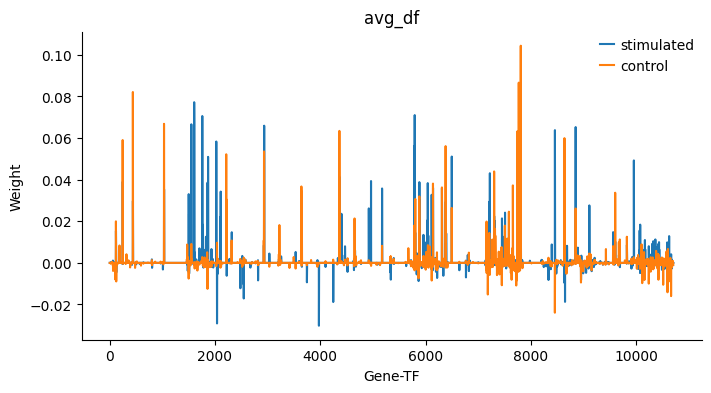

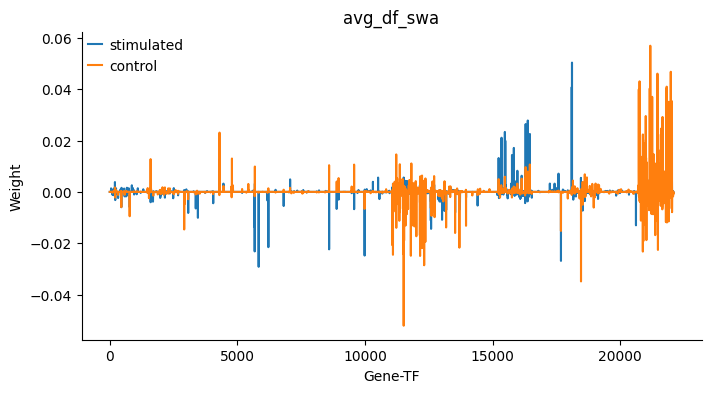

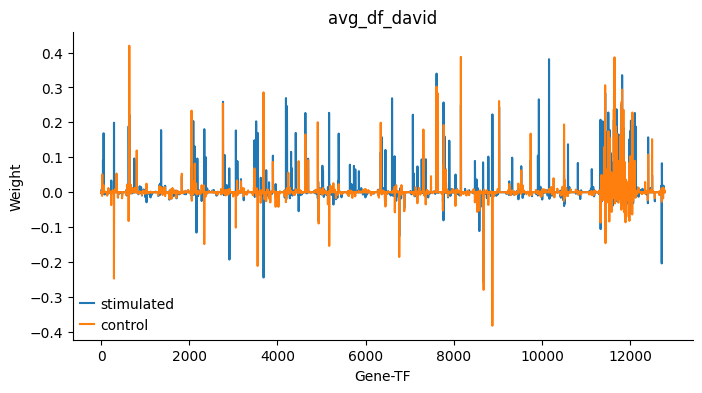

In [91]:

from matplotlib import pyplot as plt
df_dict = {
    'avg_df': avg_df,
    'avg_df_swa': avg_df_swa,
    'avg_df_david': avg_df_david
}

for name, df in df_dict.items():
  plt.figure(figsize=(100, 10))
  df[df["cond"]=="stimulated"]['wei'].plot(kind='line', figsize=(8, 4), title='wei')
  plt.gca().spines[['top', 'right']].set_visible(False)
  df[df["cond"]=="control"]['wei'].plot(kind='line', figsize=(8, 4), title='wei')
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.xlabel('Gene-TF')
  plt.ylabel('Weight')
  plt.title(name)
  plt.legend(['stimulated', 'control'])
  plt.show()

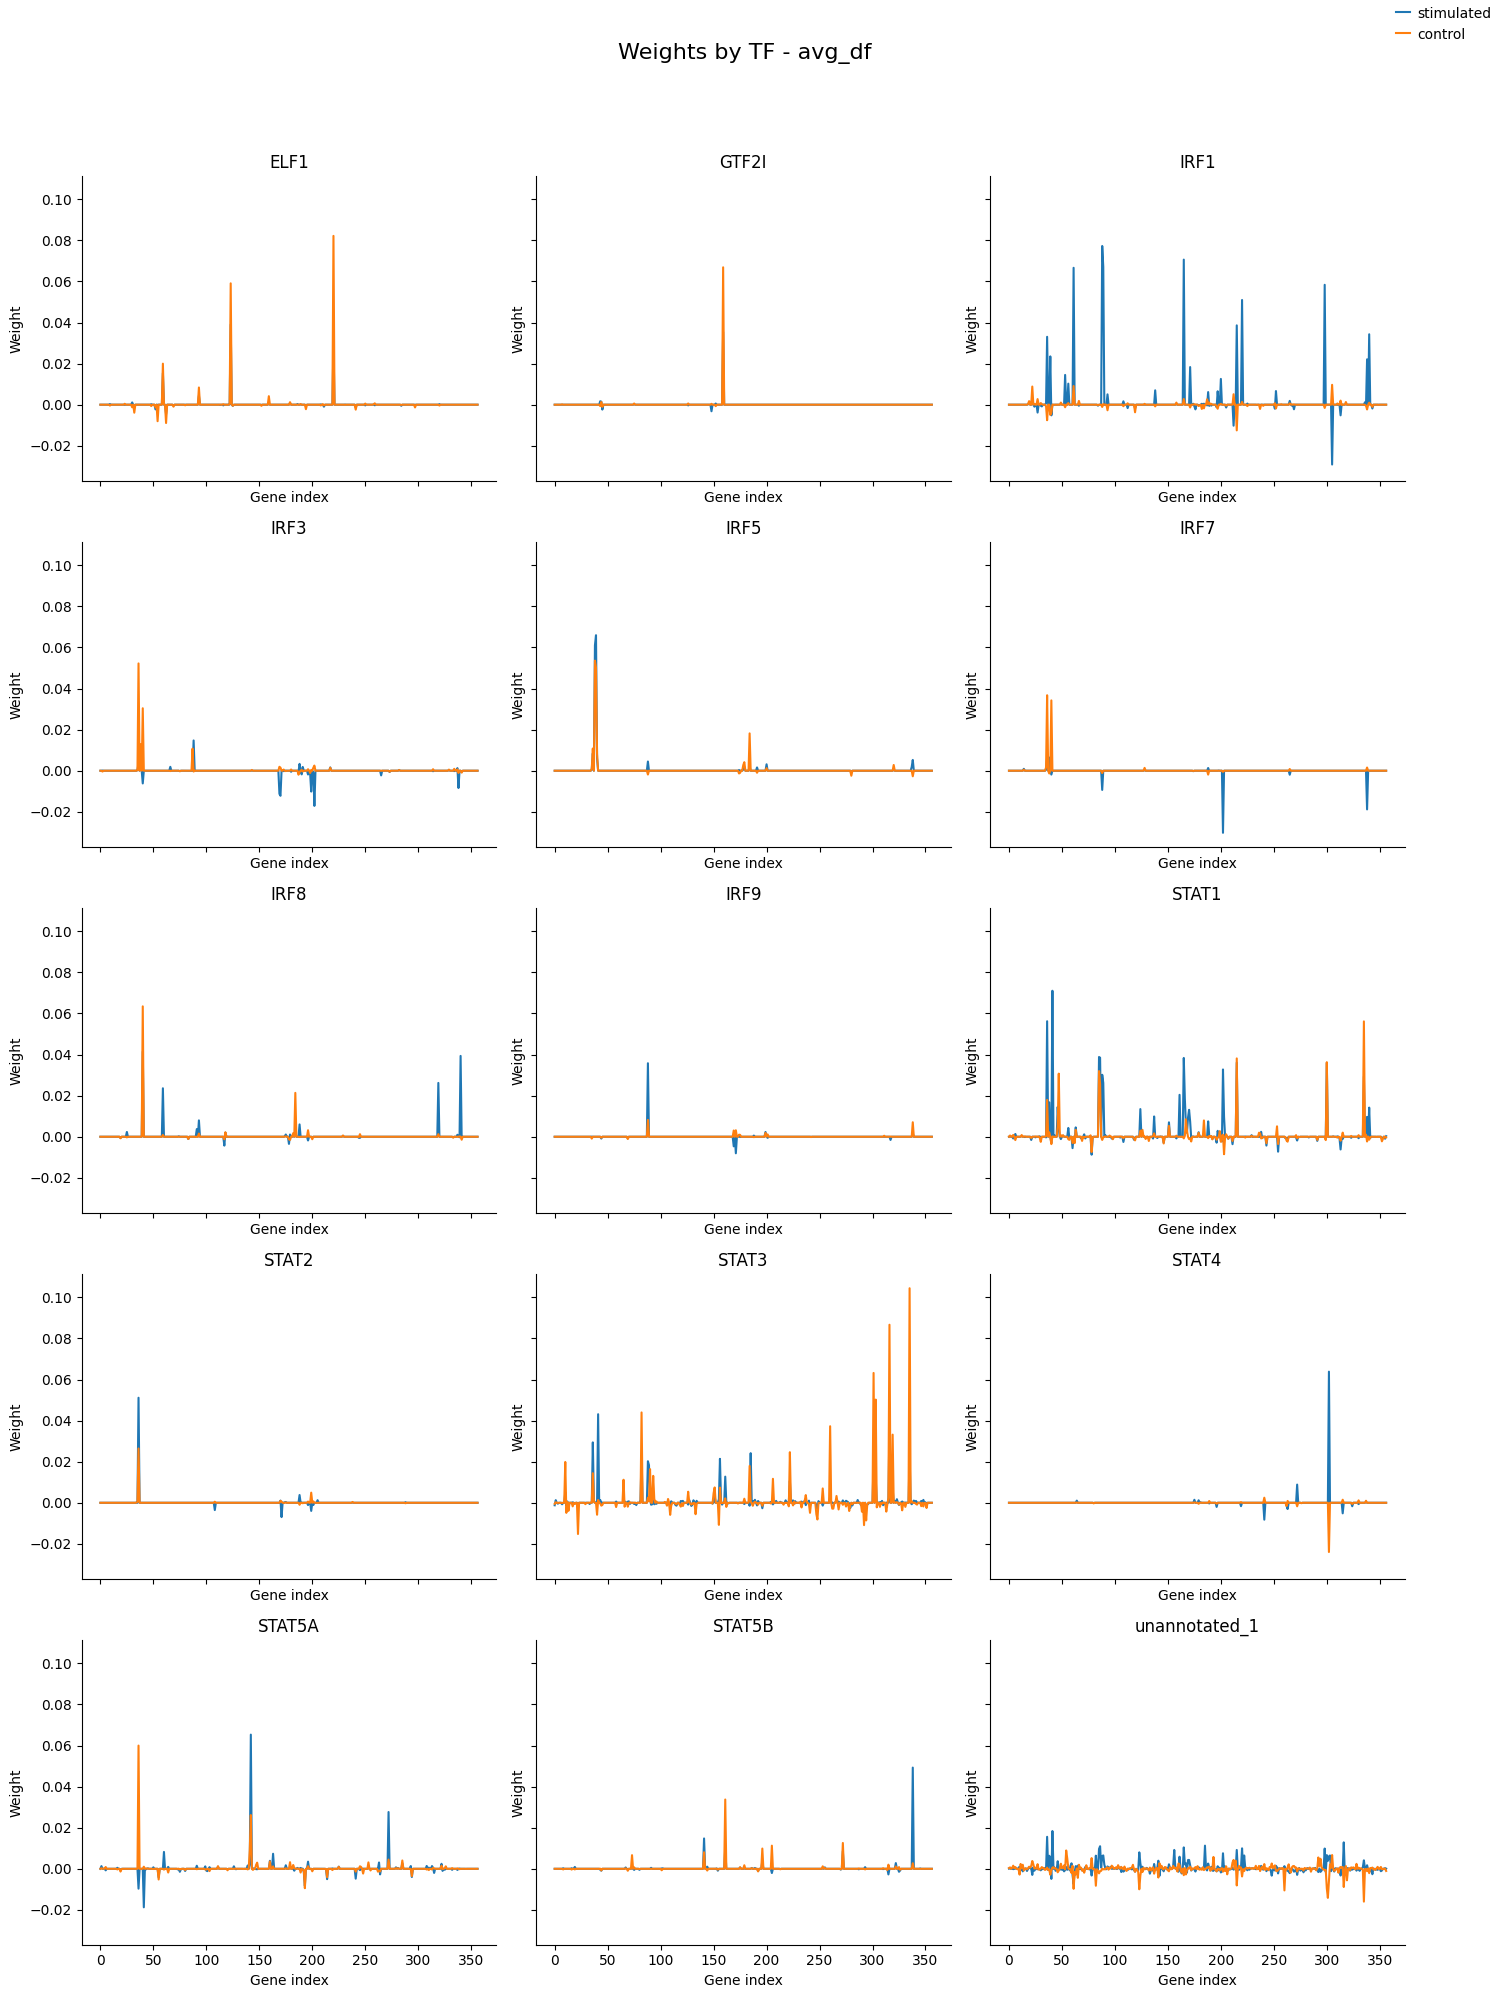

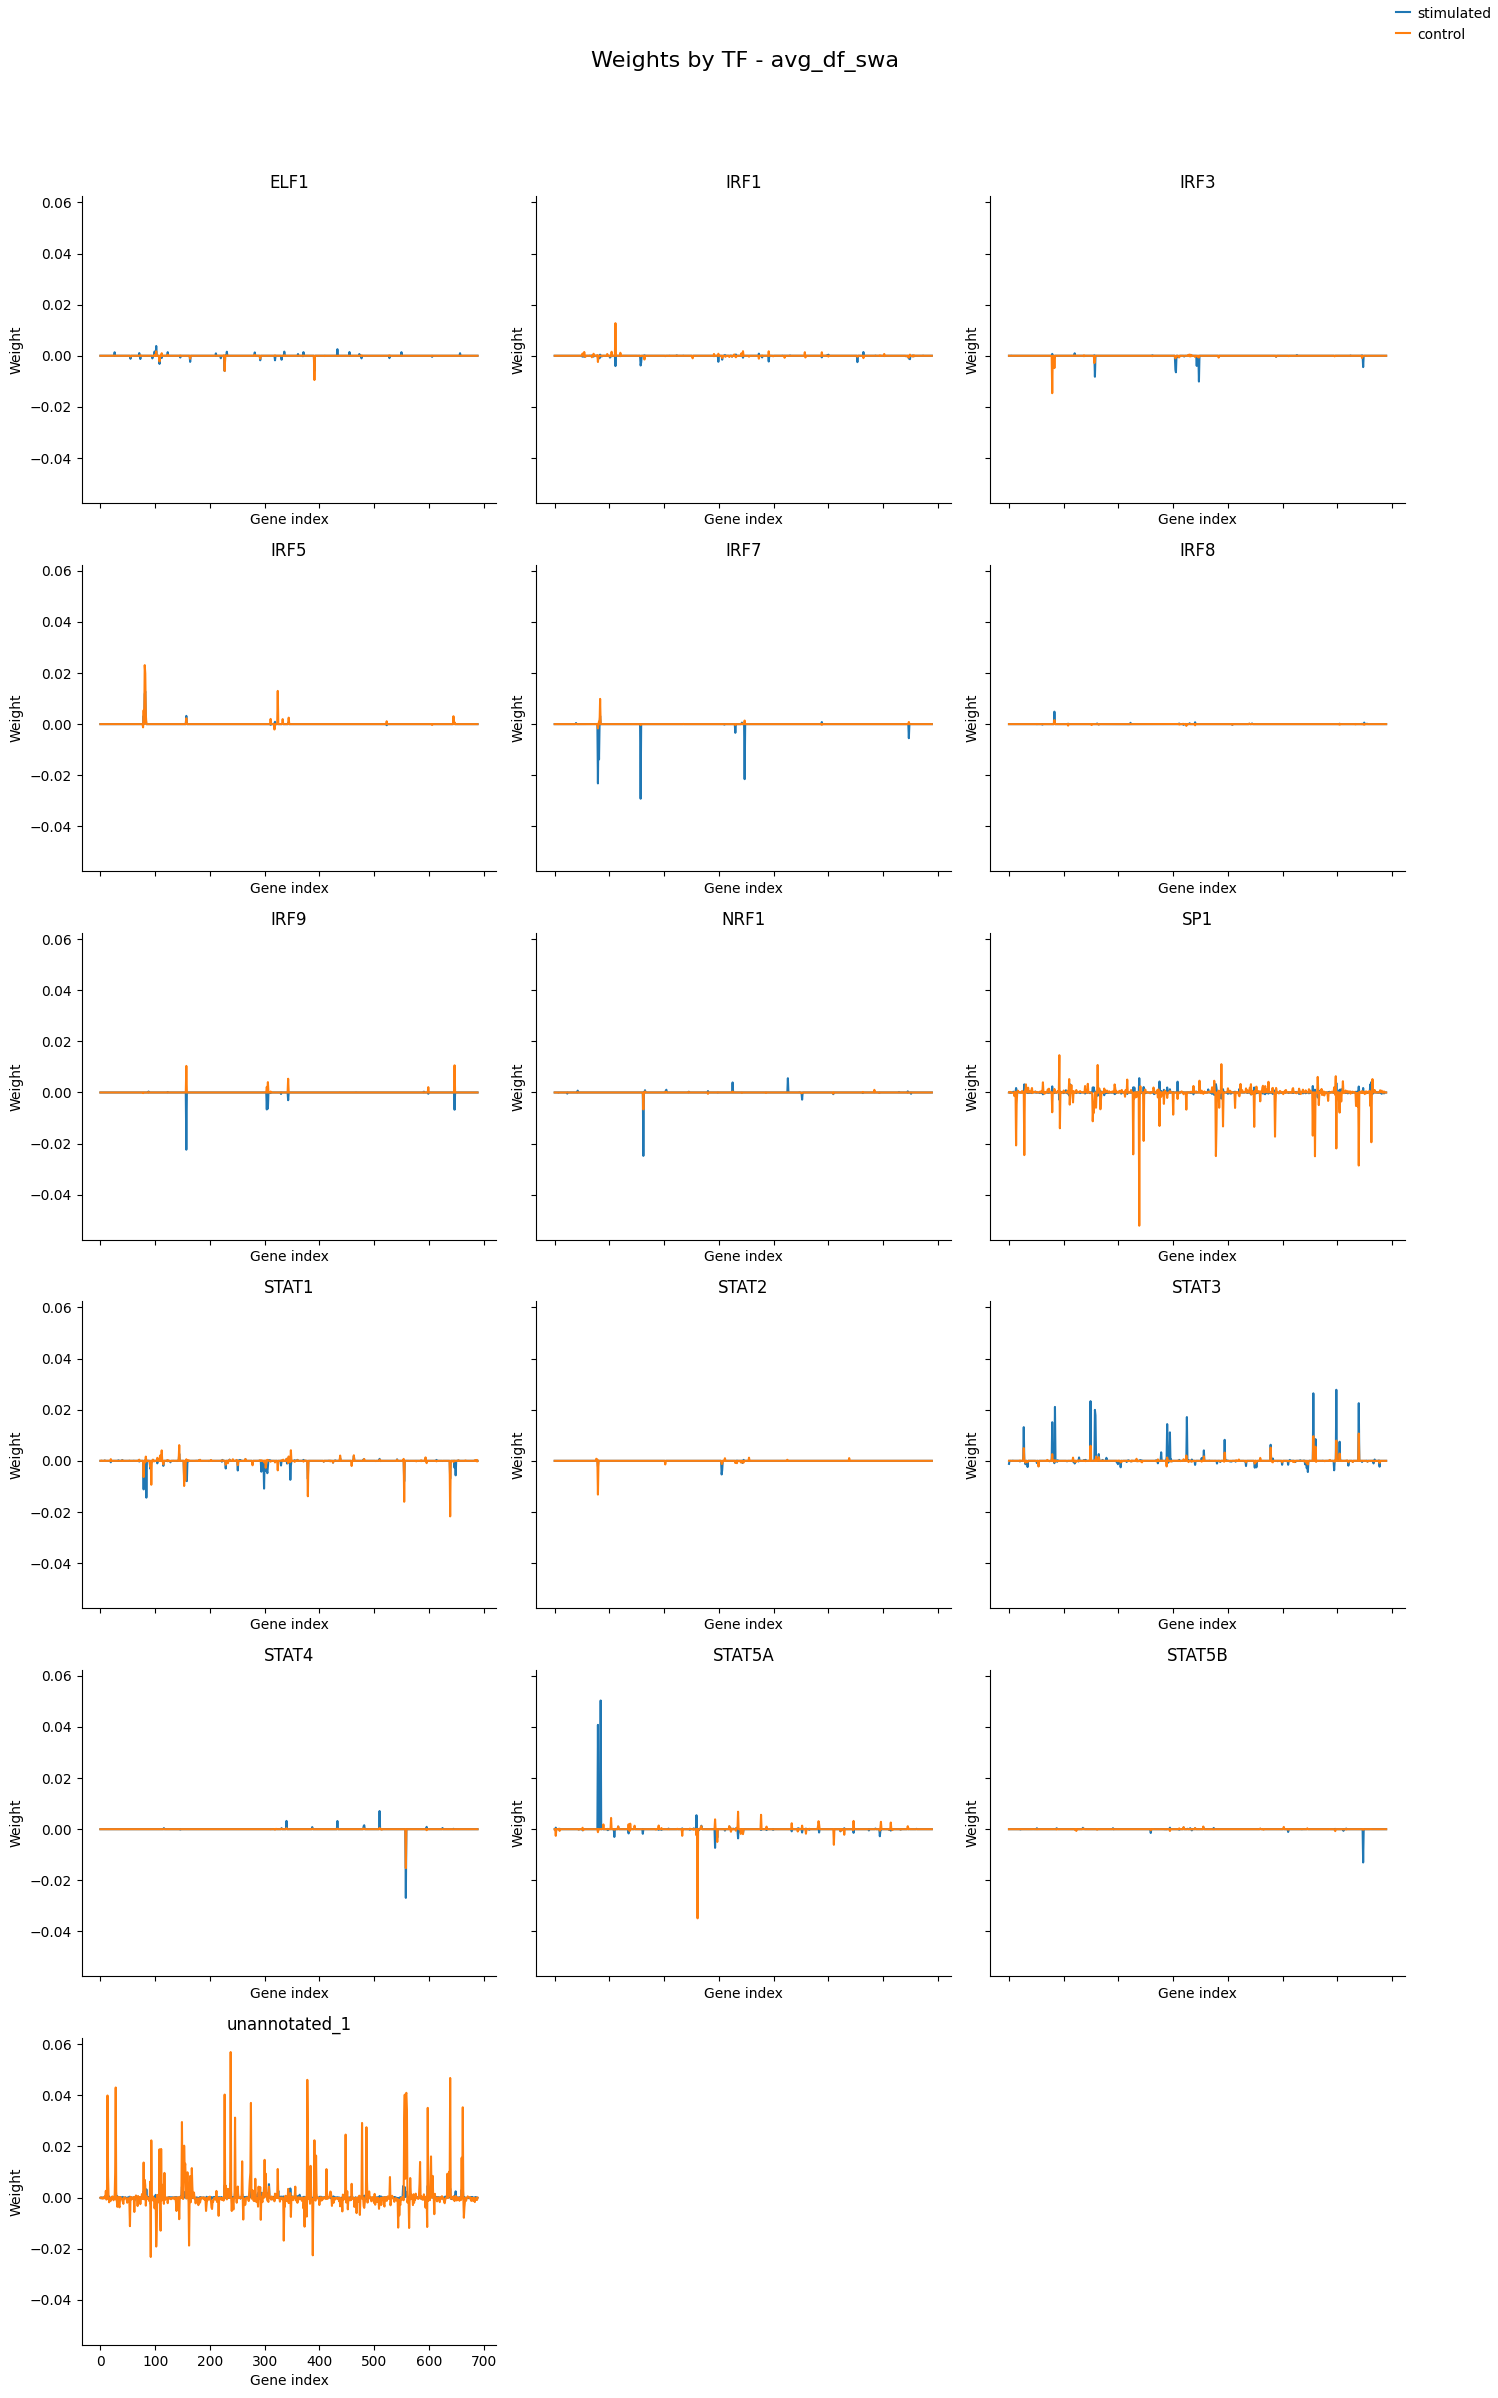

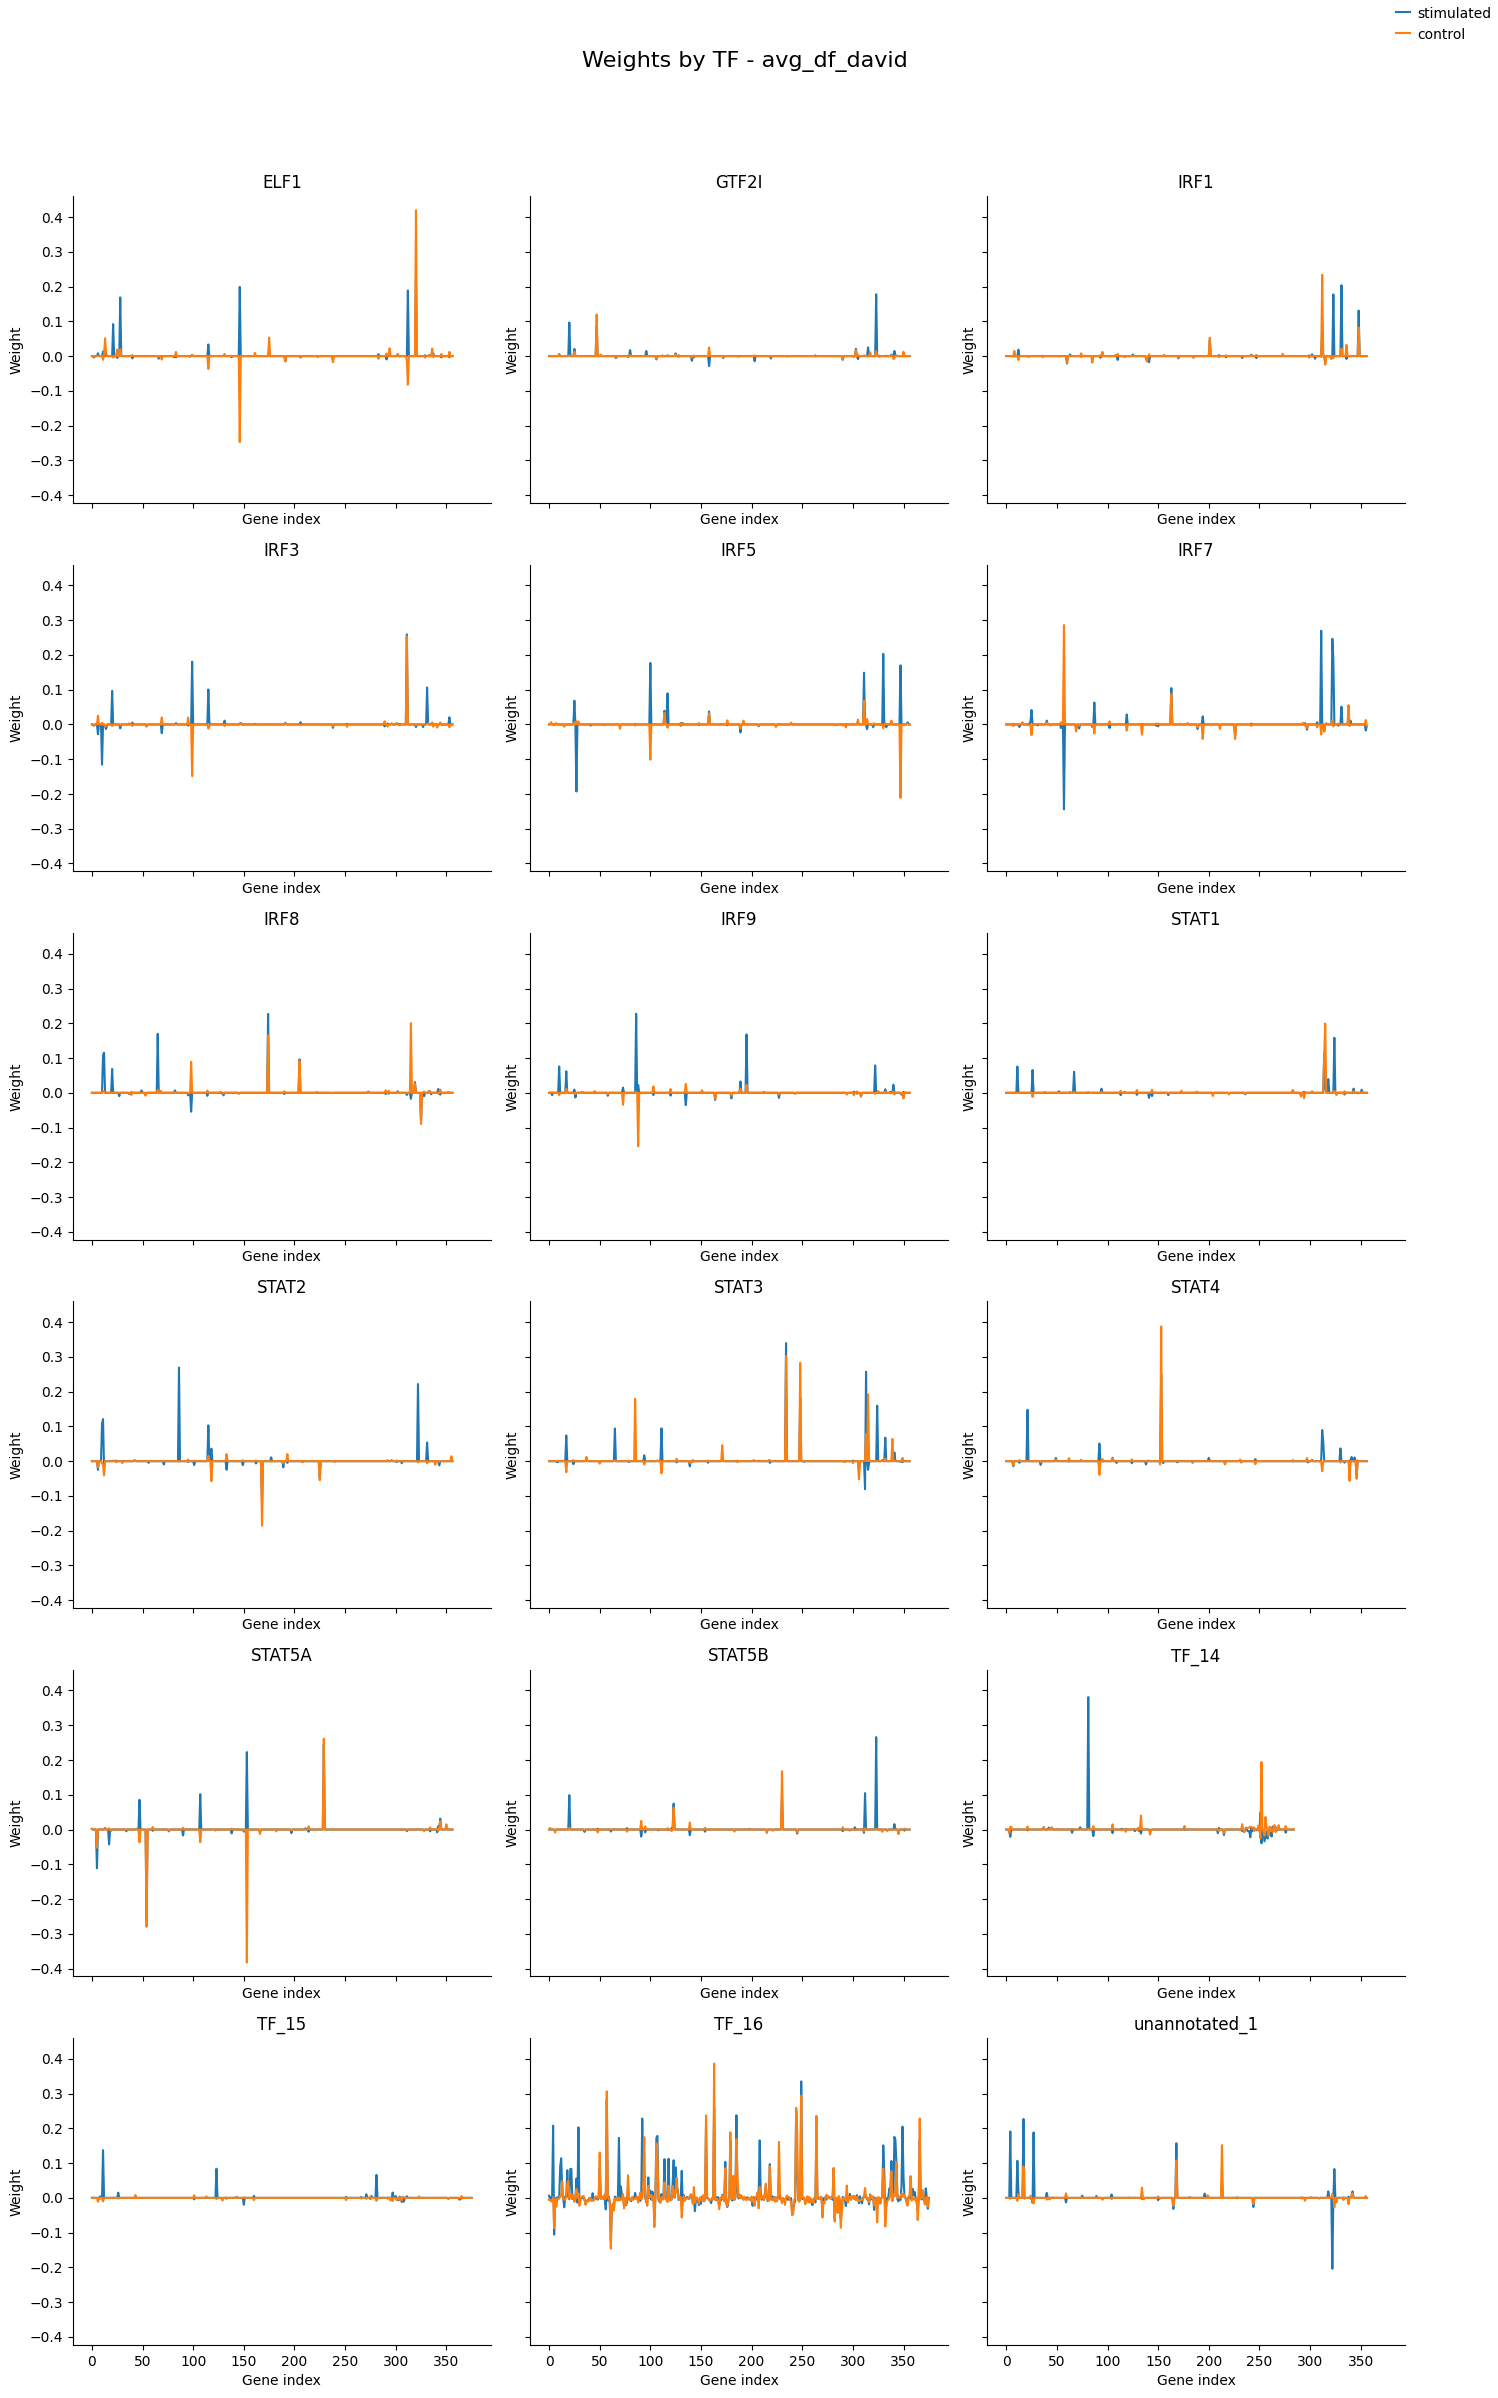

In [92]:
import matplotlib.pyplot as plt
import math

for name, df in df_dict.items():
    unique_tfs = df["tf"].unique()
    n_tfs = len(unique_tfs)

    # Definisci layout subplot (es. 3 colonne)
    ncols = 3
    nrows = math.ceil(n_tfs / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows), sharex=True, sharey=True)
    fig.suptitle(f"Weights by TF - {name}", fontsize=16)

    # Appiattisci axes se 2D
    axes = axes.flatten()

    for idx, tf in enumerate(unique_tfs):
        ax = axes[idx]

        # Filtra per tf e condizione
        stim = df[(df["cond"] == "stimulated") & (df["tf"] == tf)]
        control = df[(df["cond"] == "control") & (df["tf"] == tf)]

        ax.plot(stim['wei'].values, label='stimulated')
        ax.plot(control['wei'].values, label='control')

        ax.set_title(tf)
        ax.spines[['top', 'right']].set_visible(False)
        ax.set_xlabel("Gene index")
        ax.set_ylabel("Weight")

    # Rimuovi subplot vuoti (se ci sono)
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    # Legenda globale
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # lascia spazio per titolo e legenda
    plt.show()


In [97]:
david

iteration      tf      gene  wei_control  STD_control  wei_stimulated  \
0             0  STAT5A    Gene_0     0.001494     0.025370        0.001911   
1             0  STAT5B    Gene_1     0.004268     0.024787        0.000418   
2             0   STAT4    Gene_2     0.007841     0.026427        0.009815   
3             0    IRF1    Gene_3    -0.002693     0.025590        0.002820   
4             0   STAT3    Gene_4    -0.002903     0.024066       -0.001795   
...         ...     ...       ...          ...          ...             ...   
6387          0   TF_16  Gene_371    -0.006683     0.028890       -0.002388   
6388          0   TF_16  Gene_372     0.002616     0.029621        0.007539   
6389          0   TF_16  Gene_373    -0.004940     0.031460       -0.001414   
6390          0   TF_16  Gene_374    -0.009732     0.029627       -0.015369   
6391          0   TF_16  Gene_375    -0.007182     0.029467        0.004550   

      STD_stimulated  
0           0.021767  
1           0.021281  
2           0.023386  
3           0.022976  
4           0.023803  
...              ...  
6387        0.031360  
6388        0.029108  
6389        0.028381  
6390        0.029311  
6391        0.028634  

[6392 rows x 7 columns]

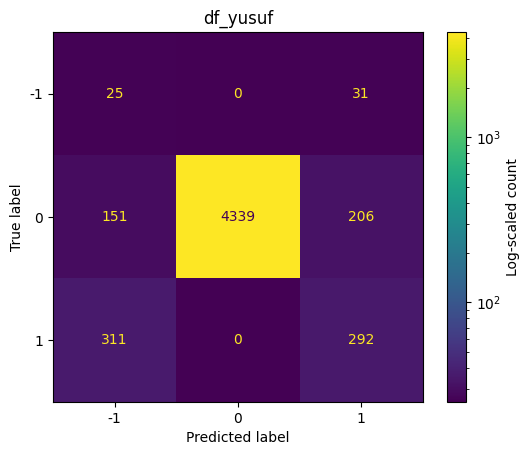

<ipython-input-93-f99d8e42f108>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confusion['weight_model'] = np.where(confusion['wei'] < 0, -1,


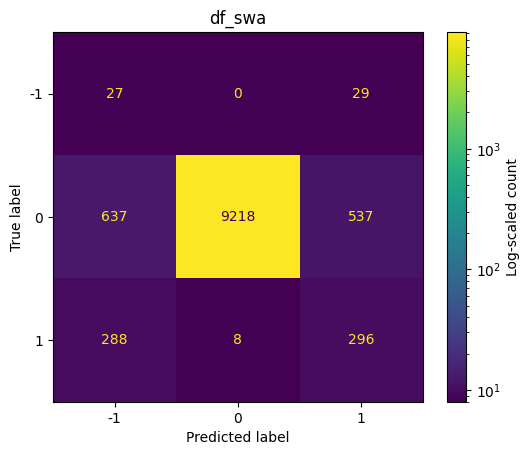

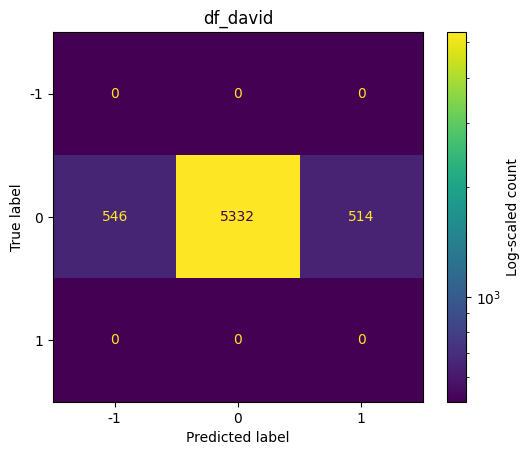

In [93]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import LogNorm
def confusion_draw(df, name):
  avg_df_forconf = df[df["cond"]=="control"].groupby(['tf', 'gene'], as_index=False)['wei'].mean()
  confusion= pd.merge(filtered_regulons, avg_df_forconf,
                  left_on=['source', 'target'],
                  right_on=['tf', 'gene'],
                         how='right'  # così mantieni tutti quelli di avg_df_forconf
    )

    # Se manca 'weight' (cioè se non era presente in filtered_regulons), metti 0
  confusion['weight'] = confusion['weight'].fillna(0)

    # Prendi solo le colonne necessarie
  confusion = confusion[['tf', 'gene', 'wei', 'weight']]

  confusion['weight_model'] = np.where(confusion['wei'] < 0, -1,
                         np.where(confusion['wei'] > 0, 1, 0))

  cm = confusion_matrix(confusion["weight"], confusion["weight_model"], labels=[-1, 0, 1])

  # Visualizza con scala logaritmica
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap='viridis', norm=LogNorm(vmax=cm.max() if cm.max() > 0 else 1))
  disp.plot(ax=ax, cmap='viridis', colorbar=False)
  plt.colorbar(im, ax=ax, label="Log-scaled count")
  ax.set_title(name)
  plt.show()




confusion_draw(avg_df, "df_yusuf")
confusion_draw(avg_df_swa, "df_swa")
confusion_draw(avg_df_david, "df_david")

I am not sure why. The weights are +1 if they are positive and -1 if negative. The weigths close to zero might also be the one with higher deviance. In addition we dont know the condition status

In [131]:
diff_df


tf    gene  diff_wei_stim-con  abs_diff_wei          gene_tf
0      STAT4  S100A4           0.087778      0.087778  S100A4\n(STAT4)
1      STAT3   TIMP1          -0.080880      0.080880   TIMP1\n(STAT3)
2       IRF1  CXCL10           0.078356      0.078356   CXCL10\n(IRF1)
3      STAT1    CCL8           0.070913      0.070913    CCL8\n(STAT1)
4     STAT5A    CCL2          -0.069639      0.069639   CCL2\n(STAT5A)
...      ...     ...                ...           ...              ...
2457    IRF7   DDIT3           0.000000      0.000000    DDIT3\n(IRF7)
2456    IRF8     EED           0.000000      0.000000      EED\n(IRF8)
2455    IRF8   IL1RN           0.000000      0.000000    IL1RN\n(IRF8)
2454   STAT1    FLI1           0.000000      0.000000    FLI1\n(STAT1)
2462    ELF1    NT5E           0.000000      0.000000     NT5E\n(ELF1)

[5355 rows x 5 columns]

In [94]:
def obtaining_difference_and_ordering(averaged_df):
  diff_df = pd.DataFrame(columns=['tf', 'gene', 'diff_wei_stim-con'])
  for t in averaged_df.tf.unique():
    for g in averaged_df.gene.unique():
      difference=averaged_df.loc[(averaged_df["gene"]==g) & (averaged_df["tf"]==t) & (averaged_df["cond"]=="stimulated"),"wei"].iloc[0]-averaged_df.loc[(averaged_df["gene"]==g) & (averaged_df["tf"]==t) & (averaged_df["cond"]=="control"),"wei"].iloc[0]
      row= [{"tf":t,"gene":g,"diff_wei_stim-con":difference}]
      diff_df=pd.concat([diff_df,pd.DataFrame(row)],ignore_index=True)
      diff_df["abs_diff_wei"] = abs(diff_df["diff_wei_stim-con"])
      diff_df.sort_values("abs_diff_wei", inplace=True, ascending=False)
  return diff_df


In [95]:
diff_df=obtaining_difference_and_ordering(avg_df)
#diff_df_swa=obtaining_difference_and_ordering(avg_df_swa)


<ipython-input-94-b3f00d1f522d>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df=pd.concat([diff_df,pd.DataFrame(row)],ignore_index=True)


In [96]:
diff_df_david=obtaining_difference_and_ordering(avg_df_david)

<ipython-input-94-b3f00d1f522d>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df=pd.concat([diff_df,pd.DataFrame(row)],ignore_index=True)


IndexError: single positional indexer is out-of-bounds

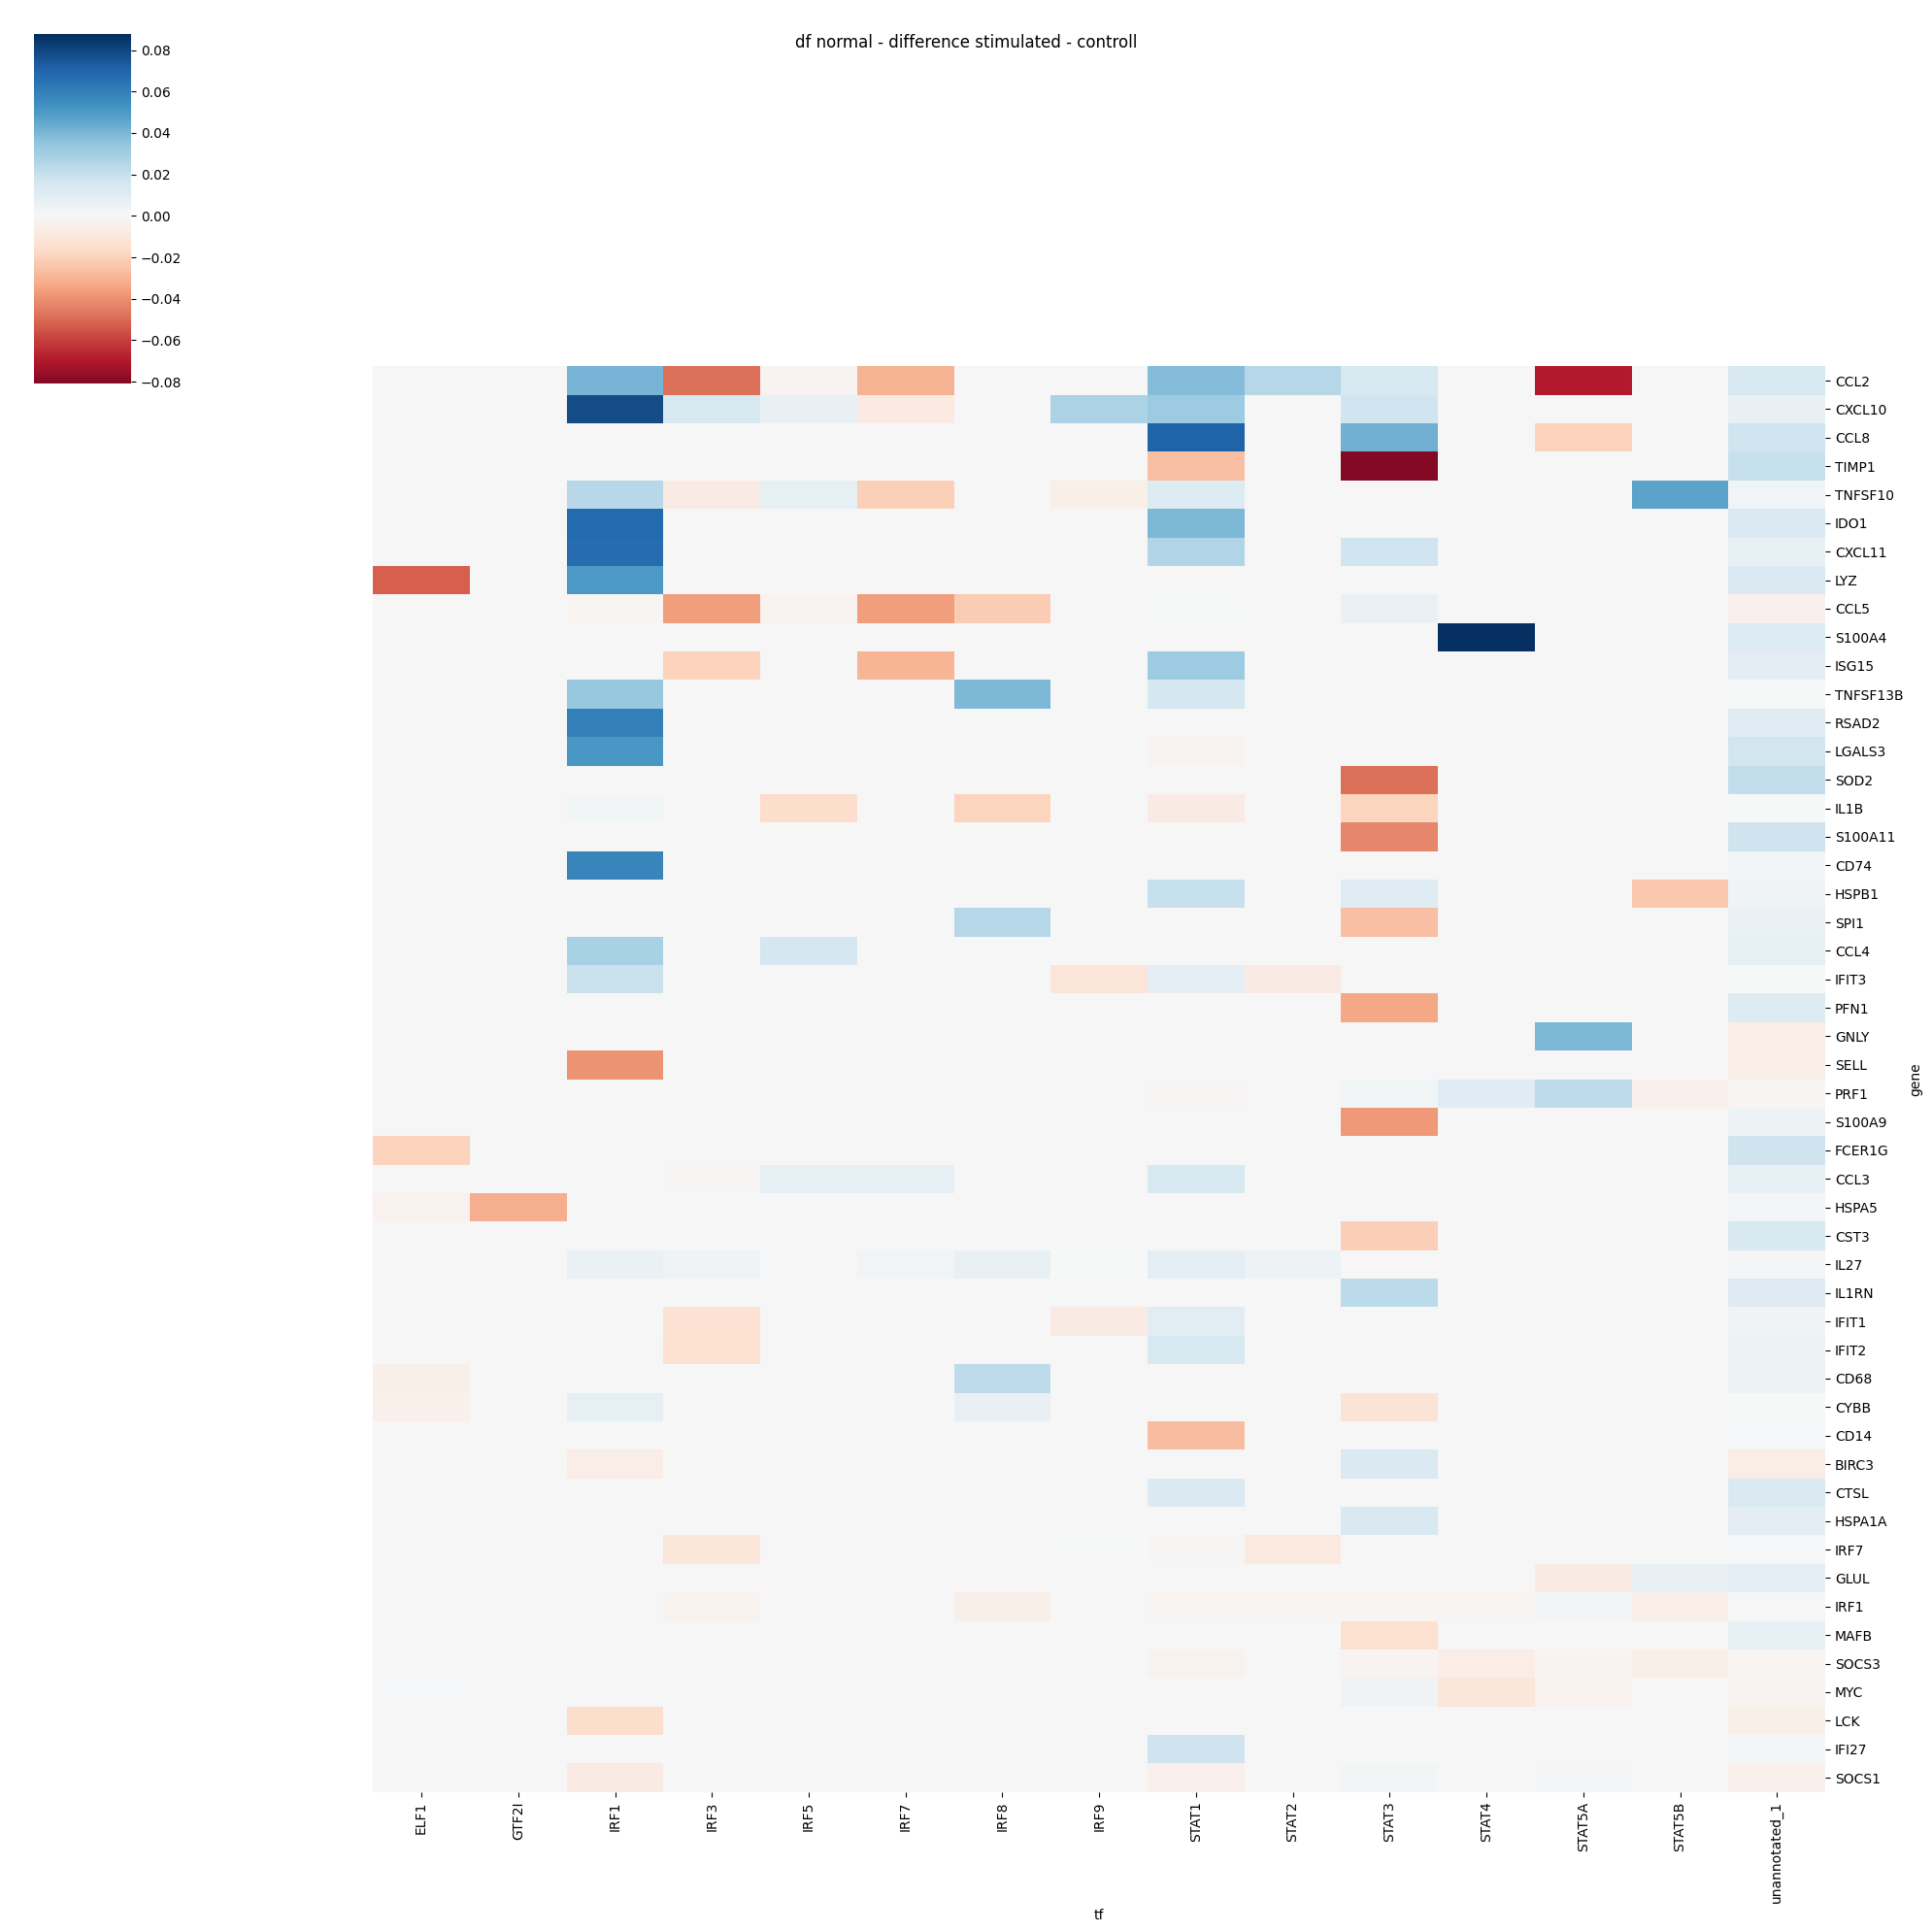

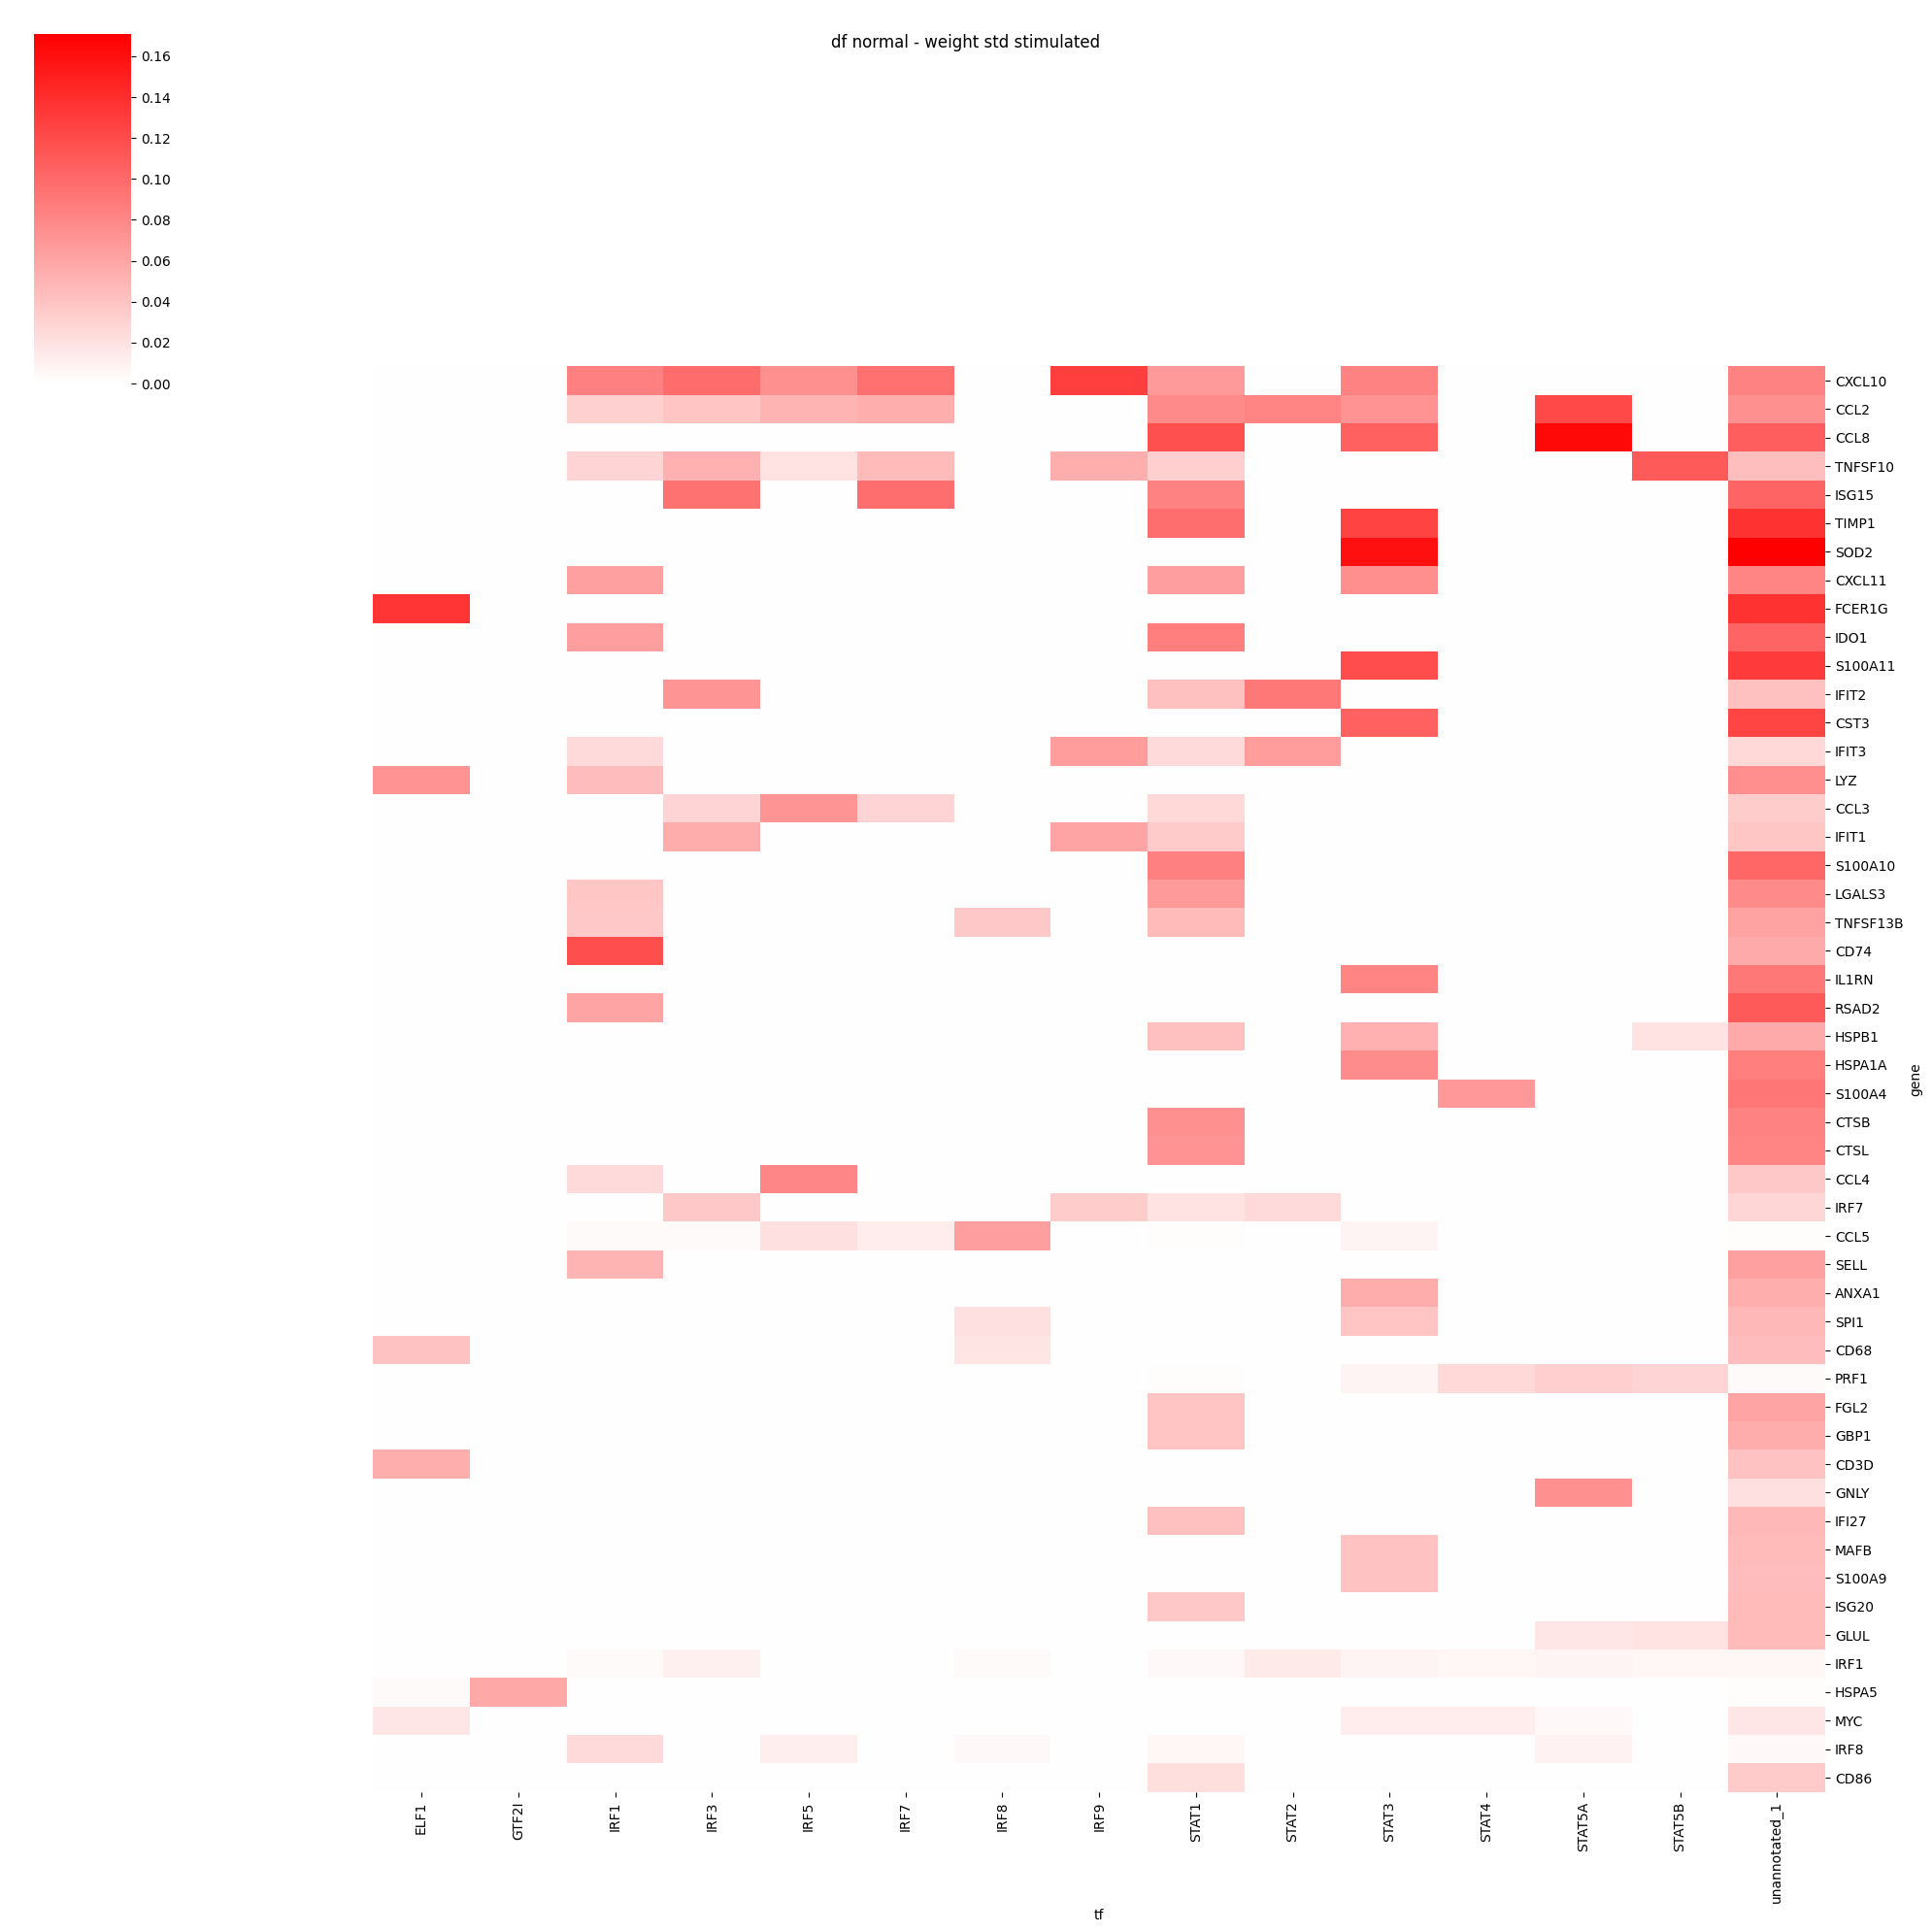

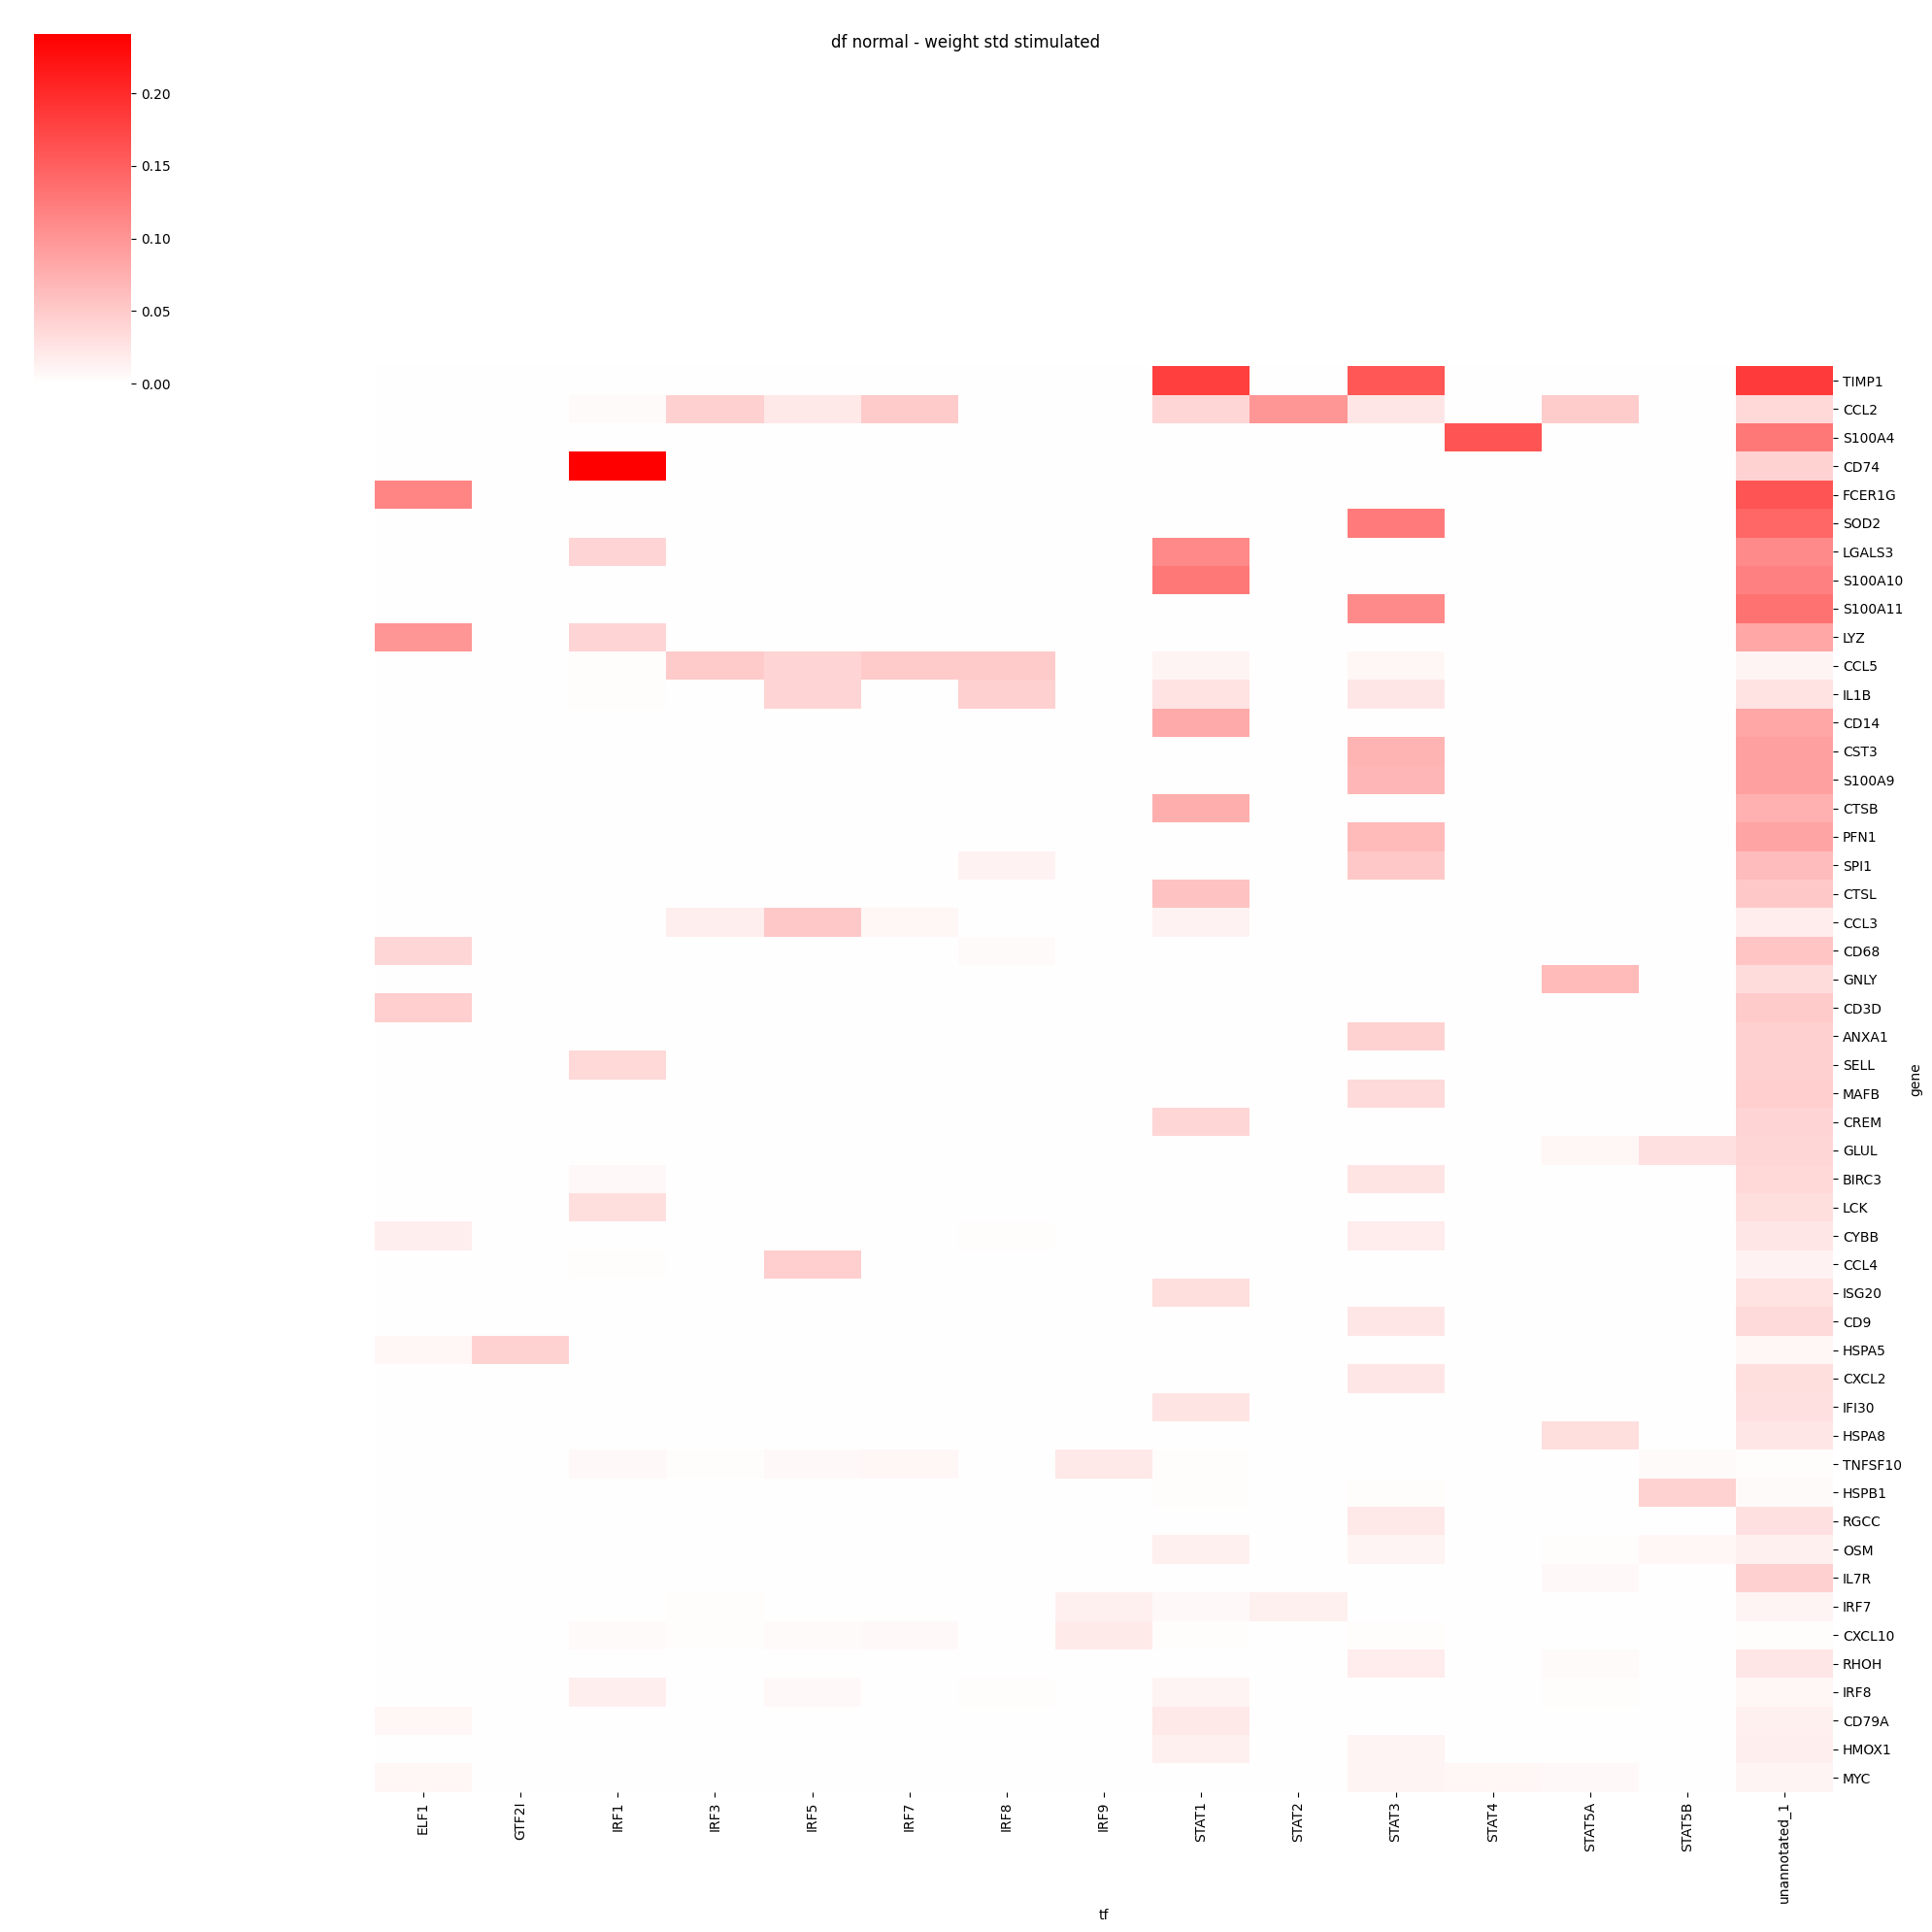

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
def graphheatmap(diff_df, title):
  # pivot of the matrix
  pivot_df = diff_df.pivot(index='gene', columns='tf', values='diff_wei_stim-con')

  # calculus of the most changing genes(sum of absolute values for genes)
  gene_variability = pivot_df.abs().sum(axis=1)

  #top variable 50
  top_genes = gene_variability.sort_values(ascending=False).head(50).index

  # filtering
  filtered_df = pivot_df.loc[top_genes]

  # Heatmap
  g=sns.clustermap(filtered_df, figsize=(20, 20),cmap="RdBu",row_cluster=False, col_cluster=False,       center=0)
  g.fig.suptitle(title+" - difference stimulated - controll")

  # pivot of the matrix
  pivot_df = avg_df[avg_df["cond"]=="stimulated"].pivot(index='gene', columns='tf', values='wei_std')

  # calculus of the most changing genes(sum of absolute values for genes)
  gene_variability = pivot_df.abs().sum(axis=1)

  #top variable 50
  top_genes = gene_variability.sort_values(ascending=False).head(50).index
  # filtering
  filtered_df = pivot_df.loc[top_genes]

  # Heatmap
  g=sns.clustermap(filtered_df, figsize=(20, 20),cmap="bwr", row_cluster=False, col_cluster=False,     center=0,)
  g.fig.suptitle(title+" - weight std stimulated")

  pivot_df = avg_df[avg_df["cond"]=="control"].pivot(index='gene', columns='tf', values='wei_std')

  # calculus of the most changing genes(sum of absolute values for genes)
  gene_variability = pivot_df.abs().sum(axis=1)

  #top variable 50
  top_genes = gene_variability.sort_values(ascending=False).head(50).index

  # filtering
  filtered_df = pivot_df.loc[top_genes]

  # Heatmap
  g=sns.clustermap(filtered_df, figsize=(20, 20),cmap="bwr",  row_cluster=False, col_cluster=False,     center=0,)
  g.fig.suptitle(title+" - weight std stimulated")

graphheatmap(diff_df, "df normal")
#graphheatmap(diff_df_swa, "df swa")
#graphheatmap(diff_df_david, "df david")

***Stat3***: STAT3 often plays a regulatory or suppressive role:

**TIMP1:**  TIMP-1 is detected, at elevated levels, in the blood of patients with an exceptionally wide range of inflammation-associated diseases.
Recent data suggest that TIMP1 expression may be regulated by signal transducer and activator of transcription (STAT)-3.
https://www.sciencedirect.com/science/article/pii/S0002944010637819

**S100A11 :** TO BE DONE
**SOD2:**SOD-2 is one of the primary cellular antioxidant enzymes, which is vital in the regulation of oxidative stress by catalyzing the conversion of superoxide to hydrogen peroxide. https://www.nature.com/articles/s41598-017-08537-2


CTS3:It can inhibit the activity of cysteine proteases including cathepsin B, L and H, and is considered to be the main endogenous inhibitor of those enzymes8. ????????




IFITM3 -sp1: The protein encoded by this gene restricts cellular entry by diverse viral pathogens.

<Figure size 1500x500 with 0 Axes>

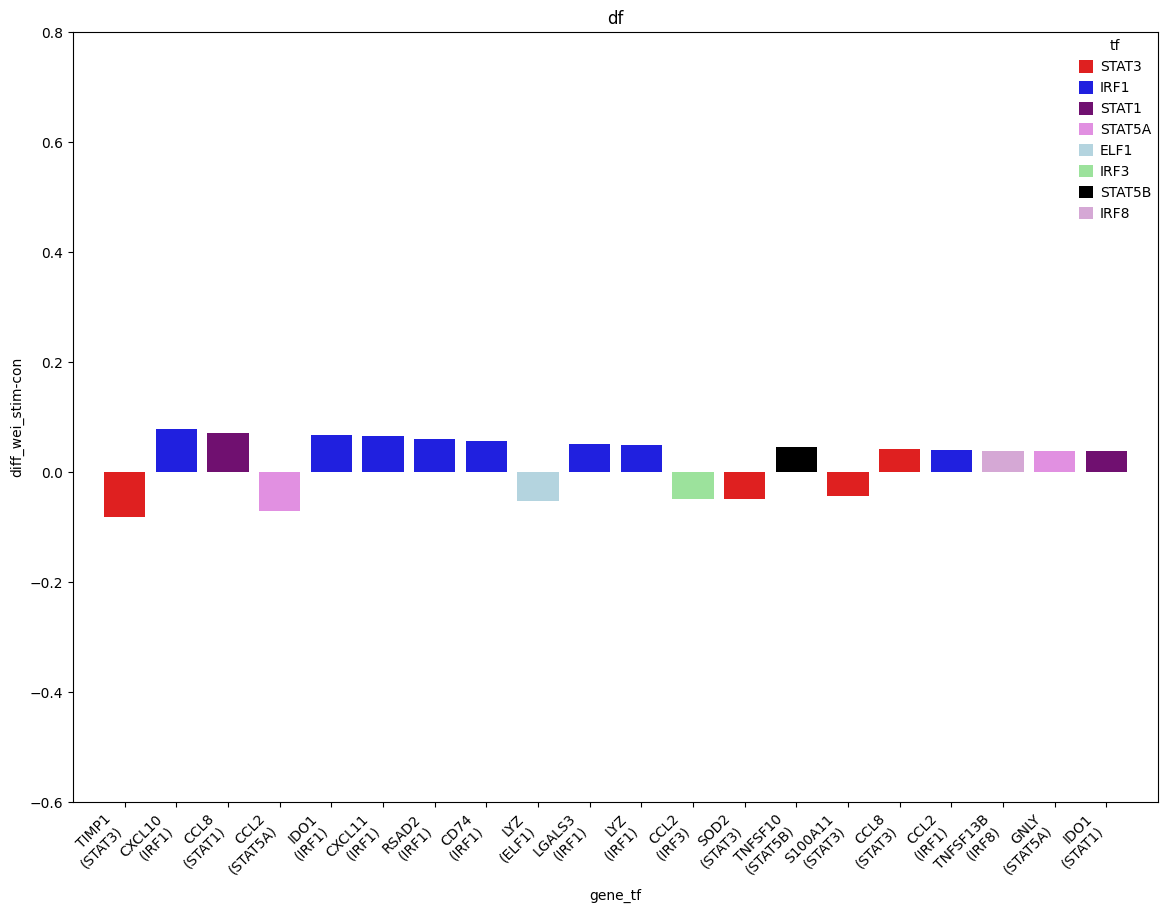

In [100]:

def plotbarplot(df, title):
  plt.figure(figsize=(15,5))
  df["gene_tf"] = df["gene"] + "\n(" + df["tf"] + ")"
  custom_palette = {
        "IRF1": "blue",
        "STAT3": "red",
        "NFKB1": "darkred",
        "IRF7":"darkorange",
        "unannotated_1": "gray",
        "SP1" : "yellow",
        "STAT2" : "orange", "STAT1":"purple", "STAT5B":"black", "ELF1":"lightblue","STAT5A":"violet", "IRF5":"lightgreen", "IRF9":"darkgreen", 'IRF3':"lightgreen", 'STAT4' :"yellowgreen", 'NRF1':"magenta", 'IRF8':"plum"
        # Aggiungi altri TF se servono
    }
  plt.figure(figsize=(14, 10))
  sns.barplot(
      data=df[1:21],
      #data=df[df["tf"] != "unannotated_1"][1:21],
      x="gene_tf",
      y="diff_wei_stim-con",
      errorbar=None,palette=custom_palette,hue="tf"
  )
  plt.title(title)
  plt.xticks(rotation=45, ha='right')
  #plt.tight_layout()
  plt.axis([-1, 20, -0.6, 0.8])
plotbarplot(diff_df, "df")
#plotbarplot(diff_df_swa, "df_swa")
#plotbarplot(diff_df_david, "df_david")

**CCL2 (stat2) :**  The critical role of type I interferon receptor signaling for CCL2 production in the lung was confirmed in type I interferon receptor-deficient mice
**hspb1 (stat5b):** The effects of HSP27 on human monocytes (MO) are predominantly antiinflammatory through preferential interleukin (IL)10 induction and by alteration of MO to immature dendritic cells (iDCs) or MO to macrophage (Mac) differentiation.
ccl4 (stat5) :The CCL gene family is a highly versatile group of chemokines involved in immune responses, inflammation, and disease processes
ccl3(stat5) :The CCL gene family is a highly versatile group of chemokines involved in immune responses, inflammation, and disease processes
anxa1(stat3)



david:

🔹 DPF3:
Double PHD Fingers 3

Chromatin reader involved in regulation of gene expression, possibly muscle and neuronal development.

Not a canonical interferon target, but could be indirectly regulated.

🔹 QPCT:
Glutaminyl-peptide cyclotransferase

Catalyzes the formation of pyroglutamate, involved in post-translational modification.

Expressed in brain, immune cells, and other tissues.

Not a typical interferon-stimulated gene, but its regulation in inflammation is plausible.

🔹 HBA1 (Hemoglobin subunit alpha 1)
Function: Part of hemoglobin; expressed mainly in erythroid cells
IFN-γ and other interferons typically suppress erythropoiesis, rather than induce hemoglobin genes.

So HBA1 upregulation in the interferon context is unlikely — or at least not typical.

🔹 MAZ is not a classical interferon-stimulated gene, but could be indirectly modulated as part of transcriptional reprogramming during stress responses.

In [101]:
diff_df

tf    gene  diff_wei_stim-con  abs_diff_wei          gene_tf
0      STAT4  S100A4           0.087778      0.087778  S100A4\n(STAT4)
1      STAT3   TIMP1          -0.080880      0.080880   TIMP1\n(STAT3)
2       IRF1  CXCL10           0.078356      0.078356   CXCL10\n(IRF1)
3      STAT1    CCL8           0.070913      0.070913    CCL8\n(STAT1)
4     STAT5A    CCL2          -0.069639      0.069639   CCL2\n(STAT5A)
...      ...     ...                ...           ...              ...
2457    IRF7   DDIT3           0.000000      0.000000    DDIT3\n(IRF7)
2456    IRF8     EED           0.000000      0.000000      EED\n(IRF8)
2455    IRF8   IL1RN           0.000000      0.000000    IL1RN\n(IRF8)
2454   STAT1    FLI1           0.000000      0.000000    FLI1\n(STAT1)
2462    ELF1    NT5E           0.000000      0.000000     NT5E\n(ELF1)

[5355 rows x 5 columns]

In [126]:
trans_f=list(diff_df[1:20]["tf"])
trans_f.append("GTF2I")
trans_f.append("GTF3A")
trans_f

['STAT3',
 'IRF1',
 'STAT1',
 'STAT5A',
 'IRF1',
 'IRF1',
 'IRF1',
 'IRF1',
 'ELF1',
 'IRF1',
 'IRF1',
 'IRF3',
 'STAT3',
 'STAT5B',
 'STAT3',
 'STAT3',
 'IRF1',
 'IRF8',
 'STAT5A',
 'GTF2I',
 'GTF3A']

<ipython-input-127-fdf6b79eccba>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione


[('STAT3', 'TIMP1'), ('STAT3', 'SOD2'), ('STAT3', 'S100A11'), ('STAT3', 'CCL8'), ('STAT3', 'CXCL10'), ('STAT3', 'CXCL11'), ('STAT3', 'CCL2'), ('IRF1', 'CXCL10'), ('IRF1', 'IDO1'), ('IRF1', 'CXCL11'), ('IRF1', 'RSAD2'), ('IRF1', 'CD74'), ('IRF1', 'LGALS3'), ('IRF1', 'LYZ'), ('IRF1', 'CCL2'), ('IRF1', 'TNFSF13B'), ('IRF1', 'TNFSF10'), ('STAT1', 'CCL8'), ('STAT1', 'IDO1'), ('STAT1', 'CCL2'), ('STAT1', 'CXCL10'), ('STAT1', 'TIMP1'), ('STAT1', 'CXCL11'), ('STAT1', 'TNFSF13B'), ('STAT1', 'TNFSF10'), ('STAT1', 'LGALS3'), ('STAT5A', 'CCL2'), ('STAT5A', 'GNLY'), ('STAT5A', 'CCL8'), ('ELF1', 'LYZ'), ('IRF3', 'CCL2'), ('IRF3', 'CXCL10'), ('IRF3', 'TNFSF10'), ('STAT5B', 'TNFSF10'), ('IRF8', 'TNFSF13B')]


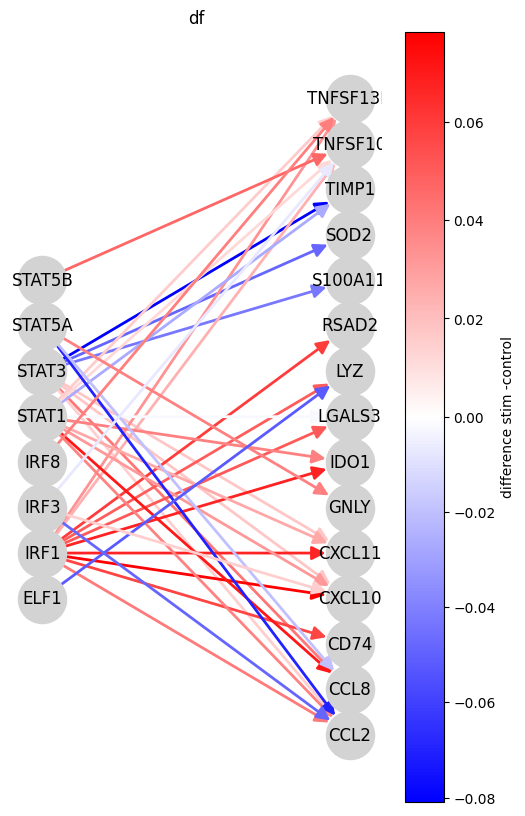

In [127]:
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm

#names=list(diff_df[1:20]["gene"])
#trans_f=list(diff_df[1:20]["tf"])

def plotgraph_unique(df,title):
  names=list(df[1:20]["gene"])
  trans_f=list(df[1:20]["tf"])
  trans_f.append("GTF2I")
  trans_f.append("GTF3A")
  df_1 = df[(df['gene'].isin(names)) &( df["tf"].isin(trans_f))& ((df['diff_wei_stim-con'] > 0.001) | (df['diff_wei_stim-con'] <- 0.001))]
  # Filtro per condizione e soglia bidirezionale
  # Crea lista di archi (TF, gene, peso)
  edges = list(df_1[['tf', 'gene', 'diff_wei_stim-con']].itertuples(index=False, name=None))

  # Costruzione grafo
  G = nx.DiGraph()
  for tf, gene, wei in edges:
      G.add_edge(tf, gene, weight=wei)

  # Layout: TF a sinistra, geni a destra
  # Ordina i nodi per garantire un layout coerente
  left_nodes = sorted(set(df_1['tf']))
  right_nodes = sorted(set(df_1['gene']))

  # Impostiamo un dizionario per la posizione dei nodi
  pos = {}
  for i, node in enumerate(left_nodes):
      pos[node] = (0, 3+i)
  for i, node in enumerate(right_nodes):
      pos[node] = (1, i)

  # Colore degli archi in base al peso (cmap diverging)
  weights = [G[u][v]['weight'] for u, v in G.edges()]
  norm = mcolors.TwoSlopeNorm(vmin=min(weights), vcenter=0, vmax=max(weights))
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione

  edge_colors = [cmap(norm(w)) for w in weights]

  # Disegno del grafo
  fig, ax = plt.subplots(figsize=(6, 10))
  nx.draw(
      G,
      pos,
      with_labels=True,
      node_color="lightgray",
      edge_color=edge_colors,
      edge_cmap=cmap,
      node_size=1200,
      arrows=True,
      arrowsize=20,
      width=2
  )
  print(G.edges())
  # Colorbar
  sm = cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])
  cbar = plt.colorbar(sm,ax=ax , label='difference stim -control')
  plt.title(title)
plotgraph_unique(diff_df, "df")
#plotgraph_unique(diff_df_swa, "df_swa")
#plotgraph_unique(diff_df_david, "df_david")


In [128]:
diff_df

tf    gene  diff_wei_stim-con  abs_diff_wei          gene_tf
0      STAT4  S100A4           0.087778      0.087778  S100A4\n(STAT4)
1      STAT3   TIMP1          -0.080880      0.080880   TIMP1\n(STAT3)
2       IRF1  CXCL10           0.078356      0.078356   CXCL10\n(IRF1)
3      STAT1    CCL8           0.070913      0.070913    CCL8\n(STAT1)
4     STAT5A    CCL2          -0.069639      0.069639   CCL2\n(STAT5A)
...      ...     ...                ...           ...              ...
2457    IRF7   DDIT3           0.000000      0.000000    DDIT3\n(IRF7)
2456    IRF8     EED           0.000000      0.000000      EED\n(IRF8)
2455    IRF8   IL1RN           0.000000      0.000000    IL1RN\n(IRF8)
2454   STAT1    FLI1           0.000000      0.000000    FLI1\n(STAT1)
2462    ELF1    NT5E           0.000000      0.000000     NT5E\n(ELF1)

[5355 rows x 5 columns]

from matplotlib import pyplot as plt
diff_df['diff_wei_stim-con'].plot(kind='hist', bins=20, title='diff_wei_stim-con')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
diff_df['abs_diff_wei'].plot(kind='hist', bins=20, title='abs_diff_wei')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
diff_df.plot(kind='scatter', x='diff_wei_stim-con', y='abs_diff_wei', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
diff_df['diff_wei_stim-con'].plot(kind='line', figsize=(8, 4), title='diff_wei_stim-con')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
diff_df['abs_diff_wei'].plot(kind='line', figsize=(8, 4), title='abs_diff_wei')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-72-f7ec0d173360>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione


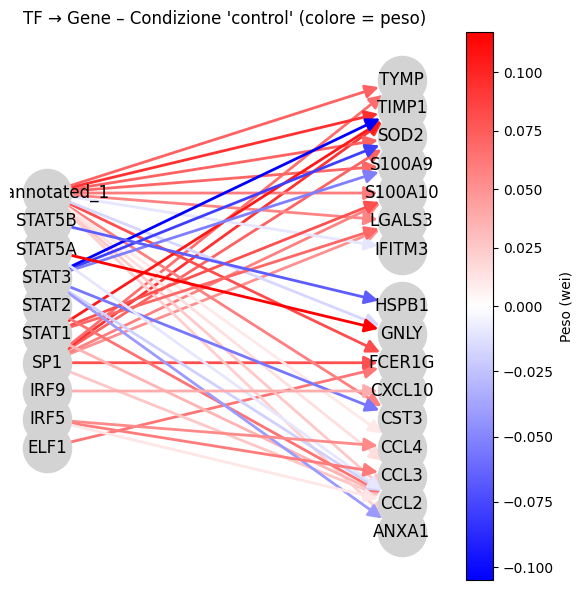

<ipython-input-72-f7ec0d173360>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione


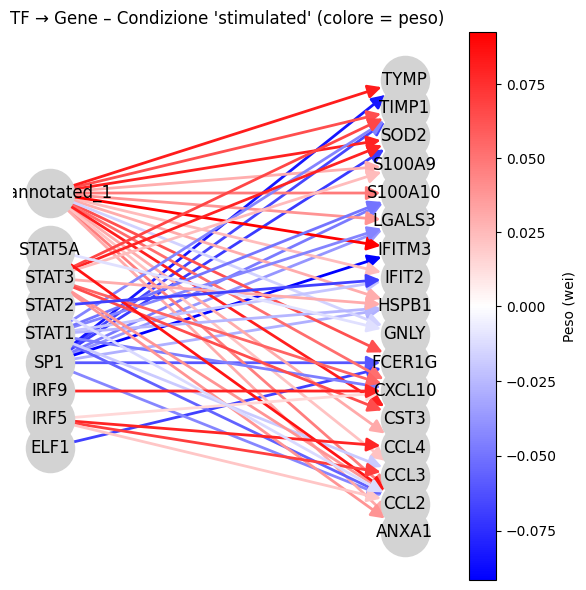

<ipython-input-72-f7ec0d173360>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione


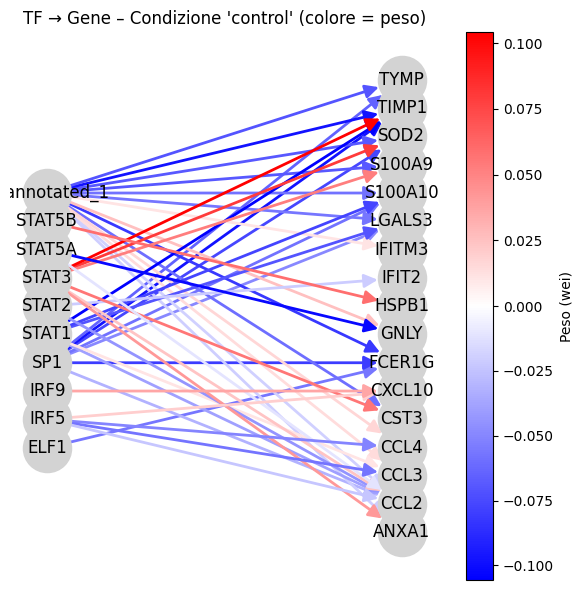

<ipython-input-72-f7ec0d173360>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione


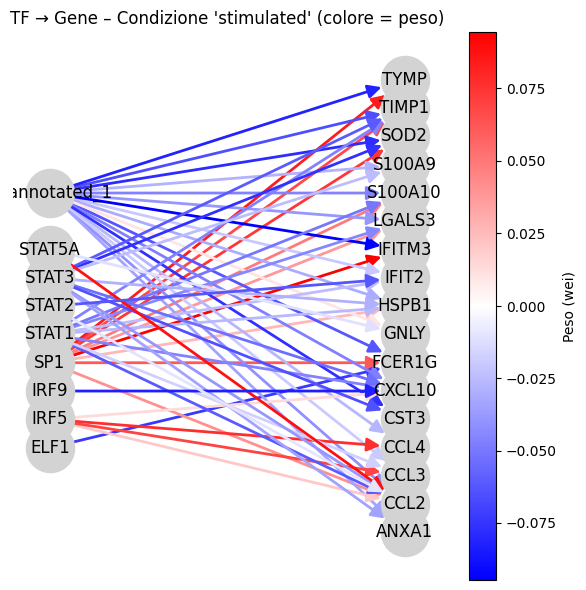

<ipython-input-72-f7ec0d173360>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione


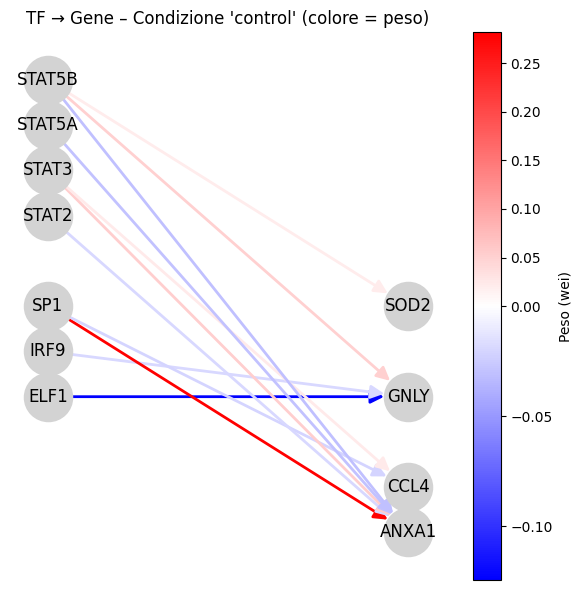

<ipython-input-72-f7ec0d173360>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione


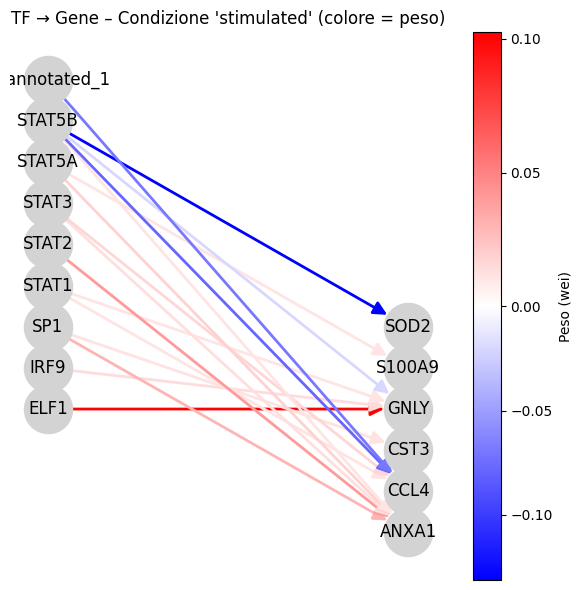

In [72]:

def plotgraph(table):
  names=list(diff_df[1:20]["gene"])
  trans_f=list(diff_df[1:20]["tf"])
  df = table[(table['gene'].isin(names)) &( table["tf"].isin(trans_f))& ((table['wei'] > 0.01) | (table['wei'] <- 0.01))]
  for condition in table['cond'].unique():

    # Filtro per condizione e soglia bidirezionale
    filtered = df[(df['cond'] == condition)]
    # Crea lista di archi (TF, gene, peso)
    edges = list(filtered[['tf', 'gene', 'wei']].itertuples(index=False, name=None))

    # Costruzione grafo
    G = nx.DiGraph()
    for tf, gene, wei in edges:
        G.add_edge(tf, gene, weight=wei)

    # Layout: TF a sinistra, geni a destra
    # Ordina i nodi per garantire un layout coerente
    left_nodes = sorted(set(df['tf']))
    right_nodes = sorted(set(df['gene']))

    # Impostiamo un dizionario per la posizione dei nodi
    pos = {}
    for i, node in enumerate(left_nodes):
        pos[node] = (0, 3+i)
    for i, node in enumerate(right_nodes):
        pos[node] = (1, i)

    # Colore degli archi in base al peso (cmap diverging)
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    norm = mcolors.TwoSlopeNorm(vmin=min(weights), vcenter=0, vmax=max(weights))
    cmap = cm.get_cmap('bwr')  # Blue = repressione, Red = attivazione

    edge_colors = [cmap(norm(w)) for w in weights]

    # Disegno del grafo
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="lightgray",
        edge_color=edge_colors,
        edge_cmap=cmap,
        node_size=1200,
        arrows=True,
        arrowsize=20,
        width=2
    )

    # Colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm,ax=ax , label='Peso (wei)')

    plt.title(f"TF → Gene – Condizione '{condition}' (colore = peso)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plotgraph(table)
plotgraph(table_swa)
plotgraph(table_david)

In [ ]:
avg_df

In [ ]:
avg_df


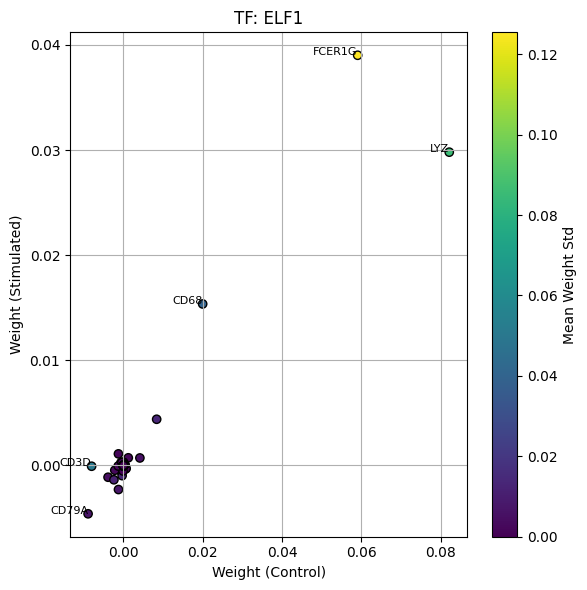

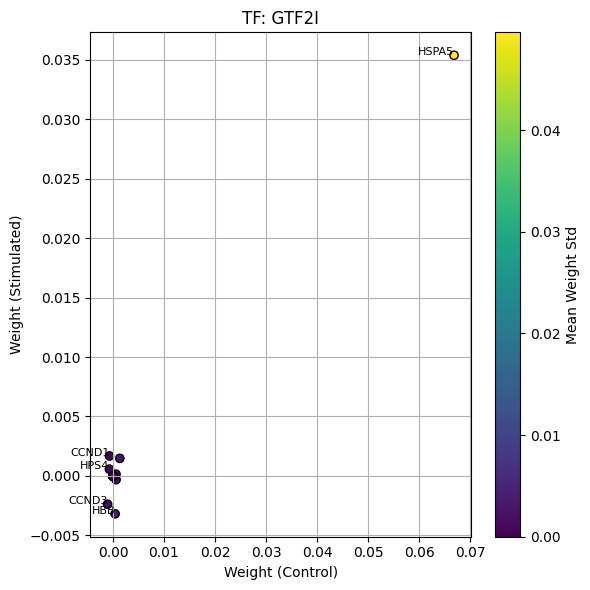

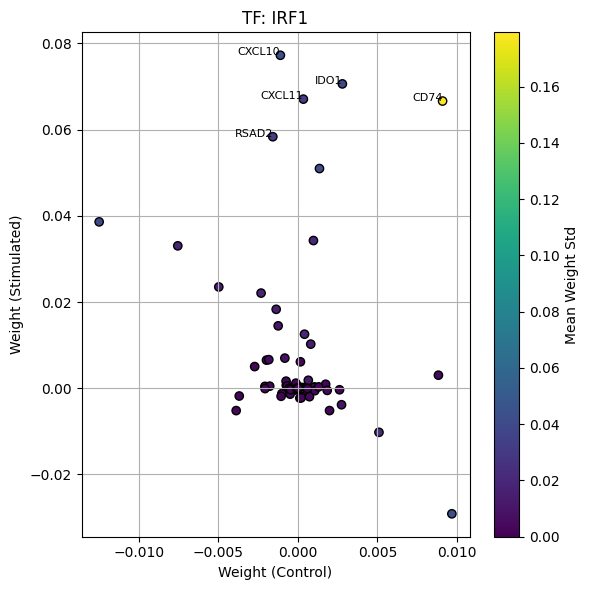

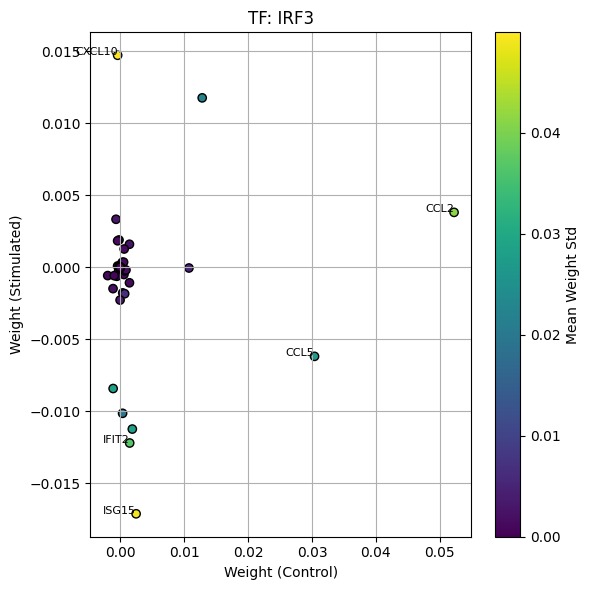

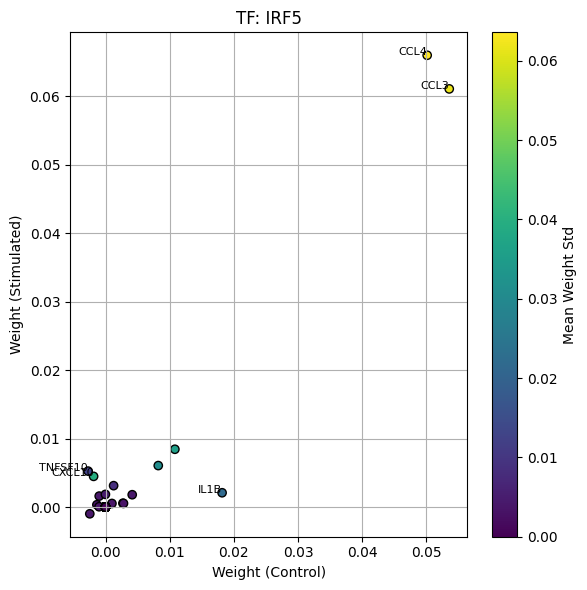

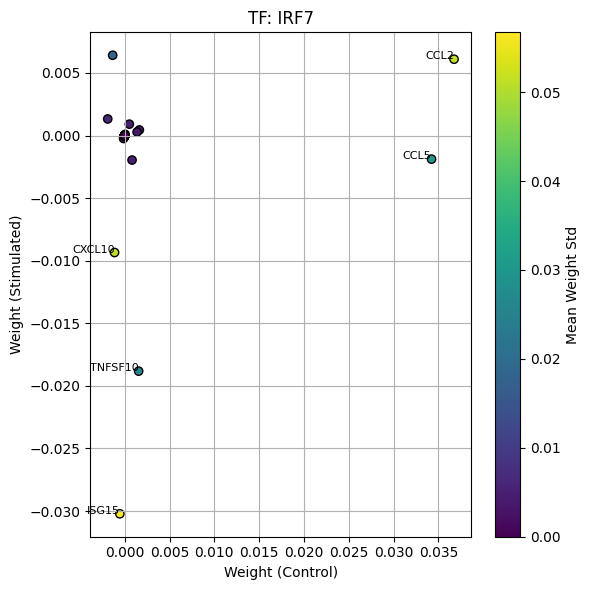

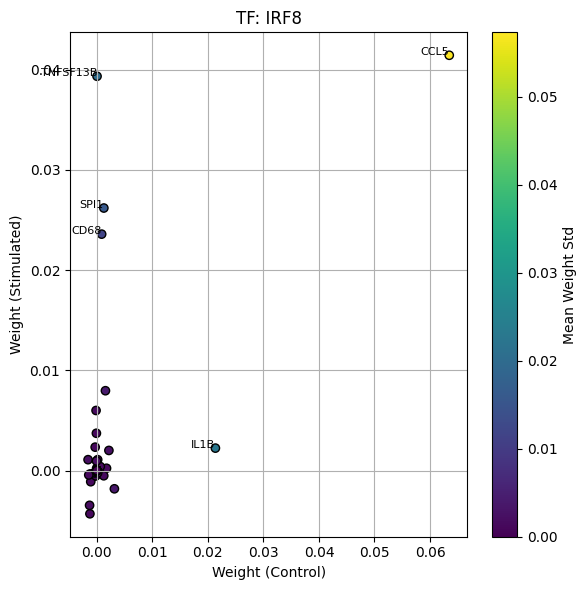

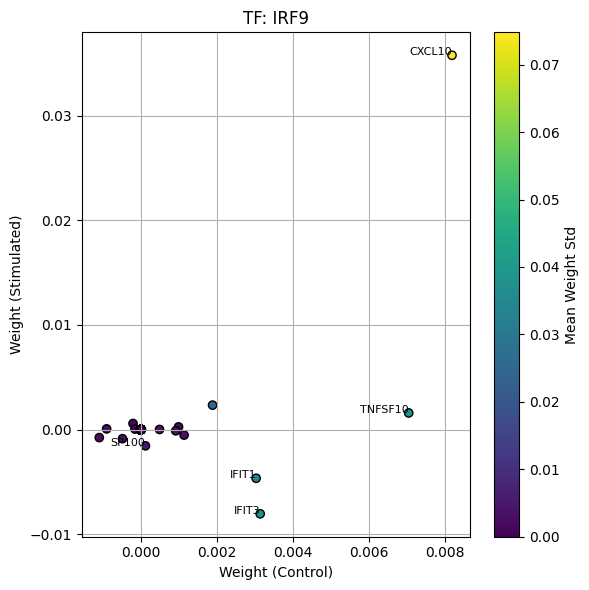

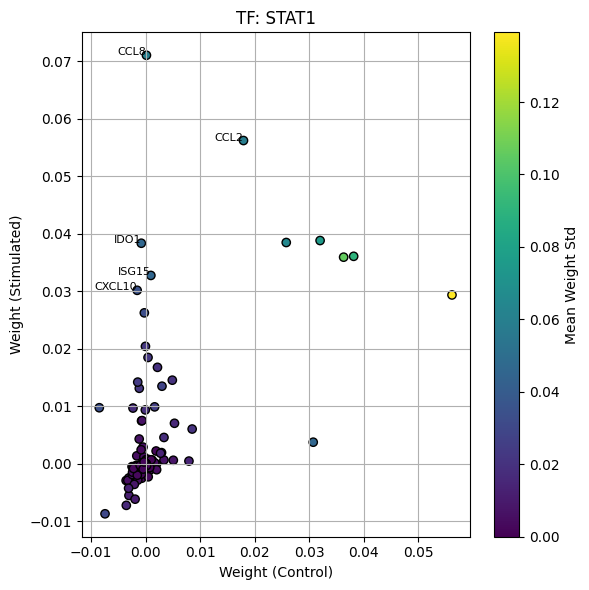

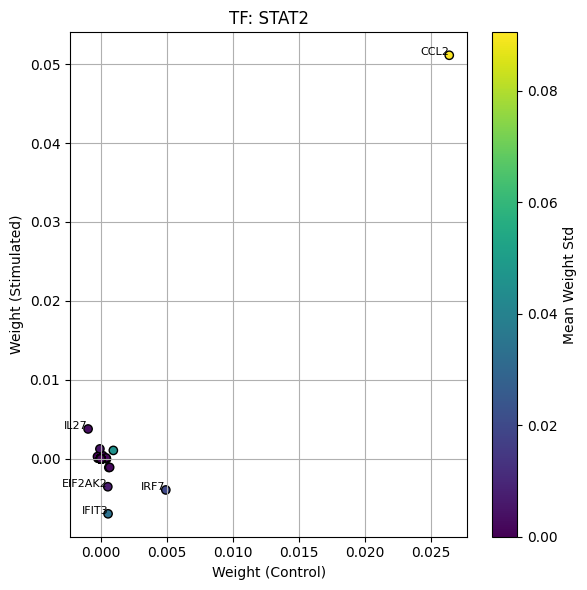

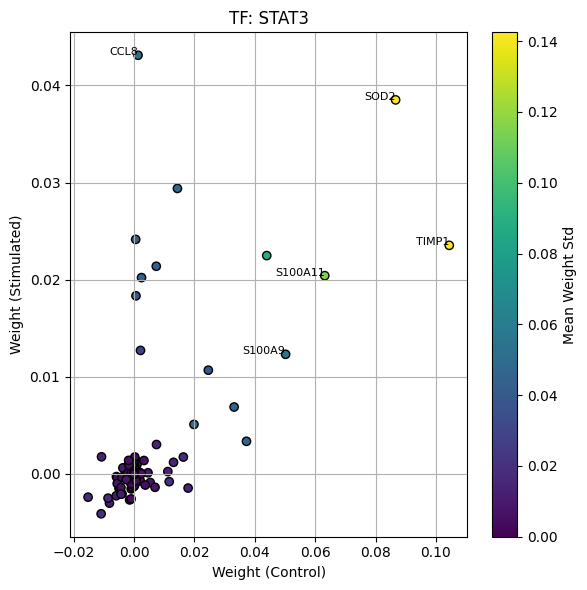

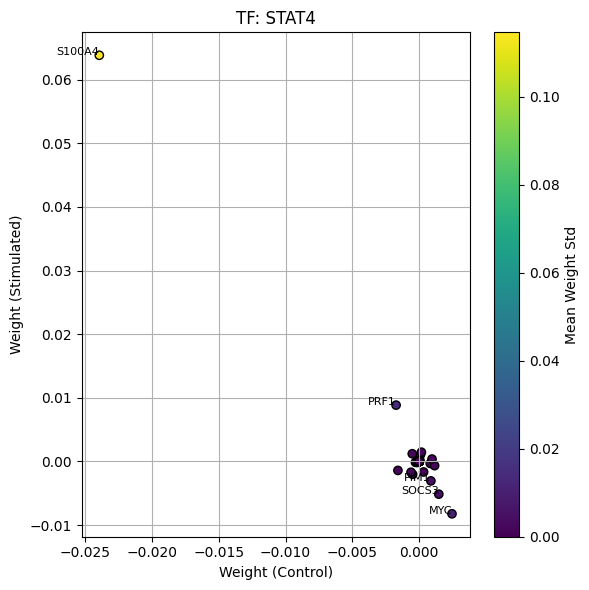

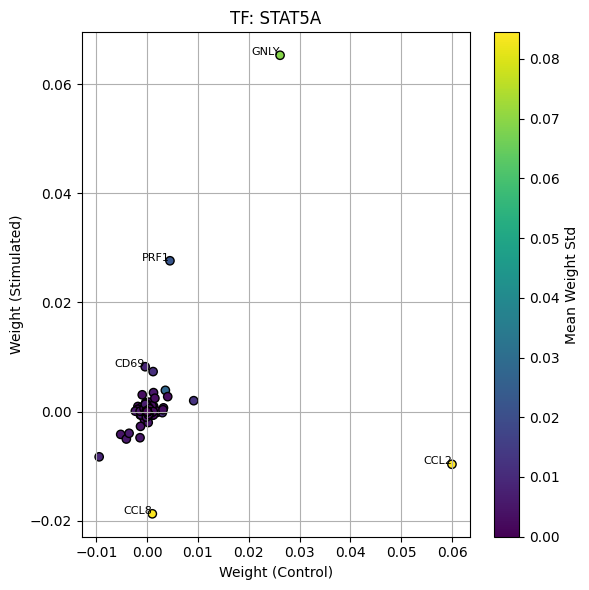

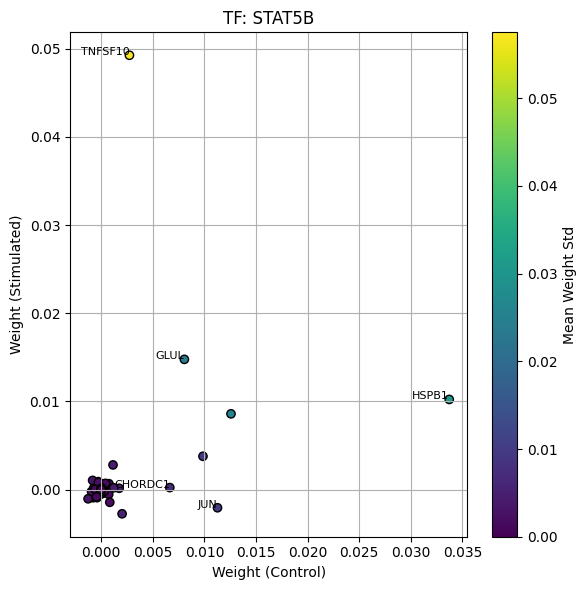

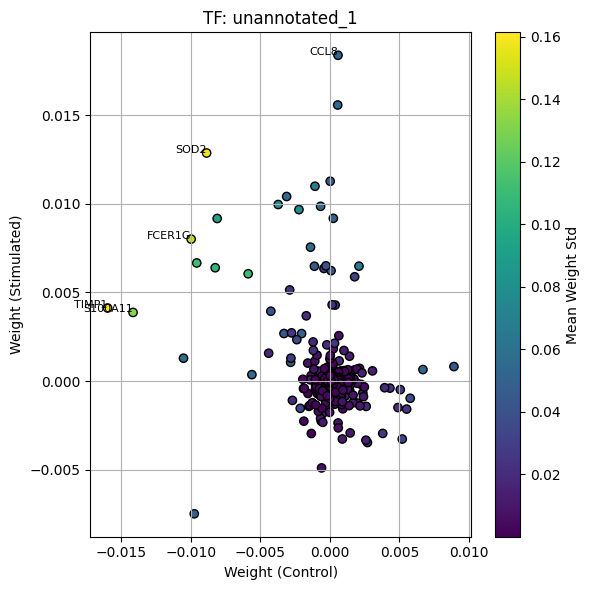

In [104]:
import pandas as pd

# Assuming your dataframe is called `df`
pivot_df = avg_df.pivot_table(
    index=['tf', 'gene'],
    columns='cond',
    values=['wei', 'wei_std']
).reset_index()

# Flatten the column names
pivot_df.columns = ['tf', 'gene', 'wei_control', 'wei_stimulated', 'wei_std_control', 'wei_std_stimulated']
pivot_df['diff'] = pivot_df['wei_stimulated'] - pivot_df['wei_control']
pivot_df['mean_std'] = (pivot_df['wei_std_control'] + pivot_df['wei_std_stimulated']) / 2


import matplotlib.pyplot as plt
import seaborn as sns
TOP_N = 5
genes_changing=list()
# Loop through each TF
for tf_name, group in pivot_df.groupby('tf'):
    plt.figure(figsize=(6, 6))

    # Scatter
    sc = plt.scatter(
        group['wei_control'],
        group['wei_stimulated'],
        c=group['mean_std'],
        cmap='viridis',
        edgecolor='k'
    )
    # Use average std for coloring
    color = ((group['wei_std_control'] + group['wei_std_stimulated']) / 2)

# Etichetta i top N geni con la maggiore differenza
    top_genes = group.loc[group['diff'].abs().nlargest(TOP_N).index]

    for _, row in top_genes.iterrows():
        genes_changing.append(row["gene"])
        plt.text(
            row['wei_control'],
            row['wei_stimulated'],
            row['gene'],

            fontsize=8,
            ha='right'
        )

    plt.title(f'TF: {tf_name}')
    plt.xlabel('Weight (Control)')
    plt.ylabel('Weight (Stimulated)')
    plt.colorbar(sc, label='Mean Weight Std')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

the ones with th eheigher sd are also the one more "alone"

In [28]:
print(avg_df_david.columns)
avg_df.columns
avg_df_david

Index(['tf', 'gene', 'cond', 'wei', 'wei_std'], dtype='object', name='tipo')


tipo              tf    gene        cond  wei  wei_std
0               ELF1    AATF     control  0.0      0.0
1               ELF1    AATF  stimulated  0.0      0.0
2               ELF1   ABCA2     control  0.0      0.0
3               ELF1   ABCA2  stimulated  0.0      0.0
4               ELF1   ABCB1     control  0.0      0.0
...              ...     ...         ...  ...      ...
22075  unannotated_1  ZNF230  stimulated  0.0      0.0
22076  unannotated_1  ZNF302     control  0.0      0.0
22077  unannotated_1  ZNF302  stimulated  0.0      0.0
22078  unannotated_1  ZNF655     control  0.0      0.0
22079  unannotated_1  ZNF655  stimulated  0.0      0.0

[22080 rows x 5 columns]

<ipython-input-108-8640fa00b116>:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


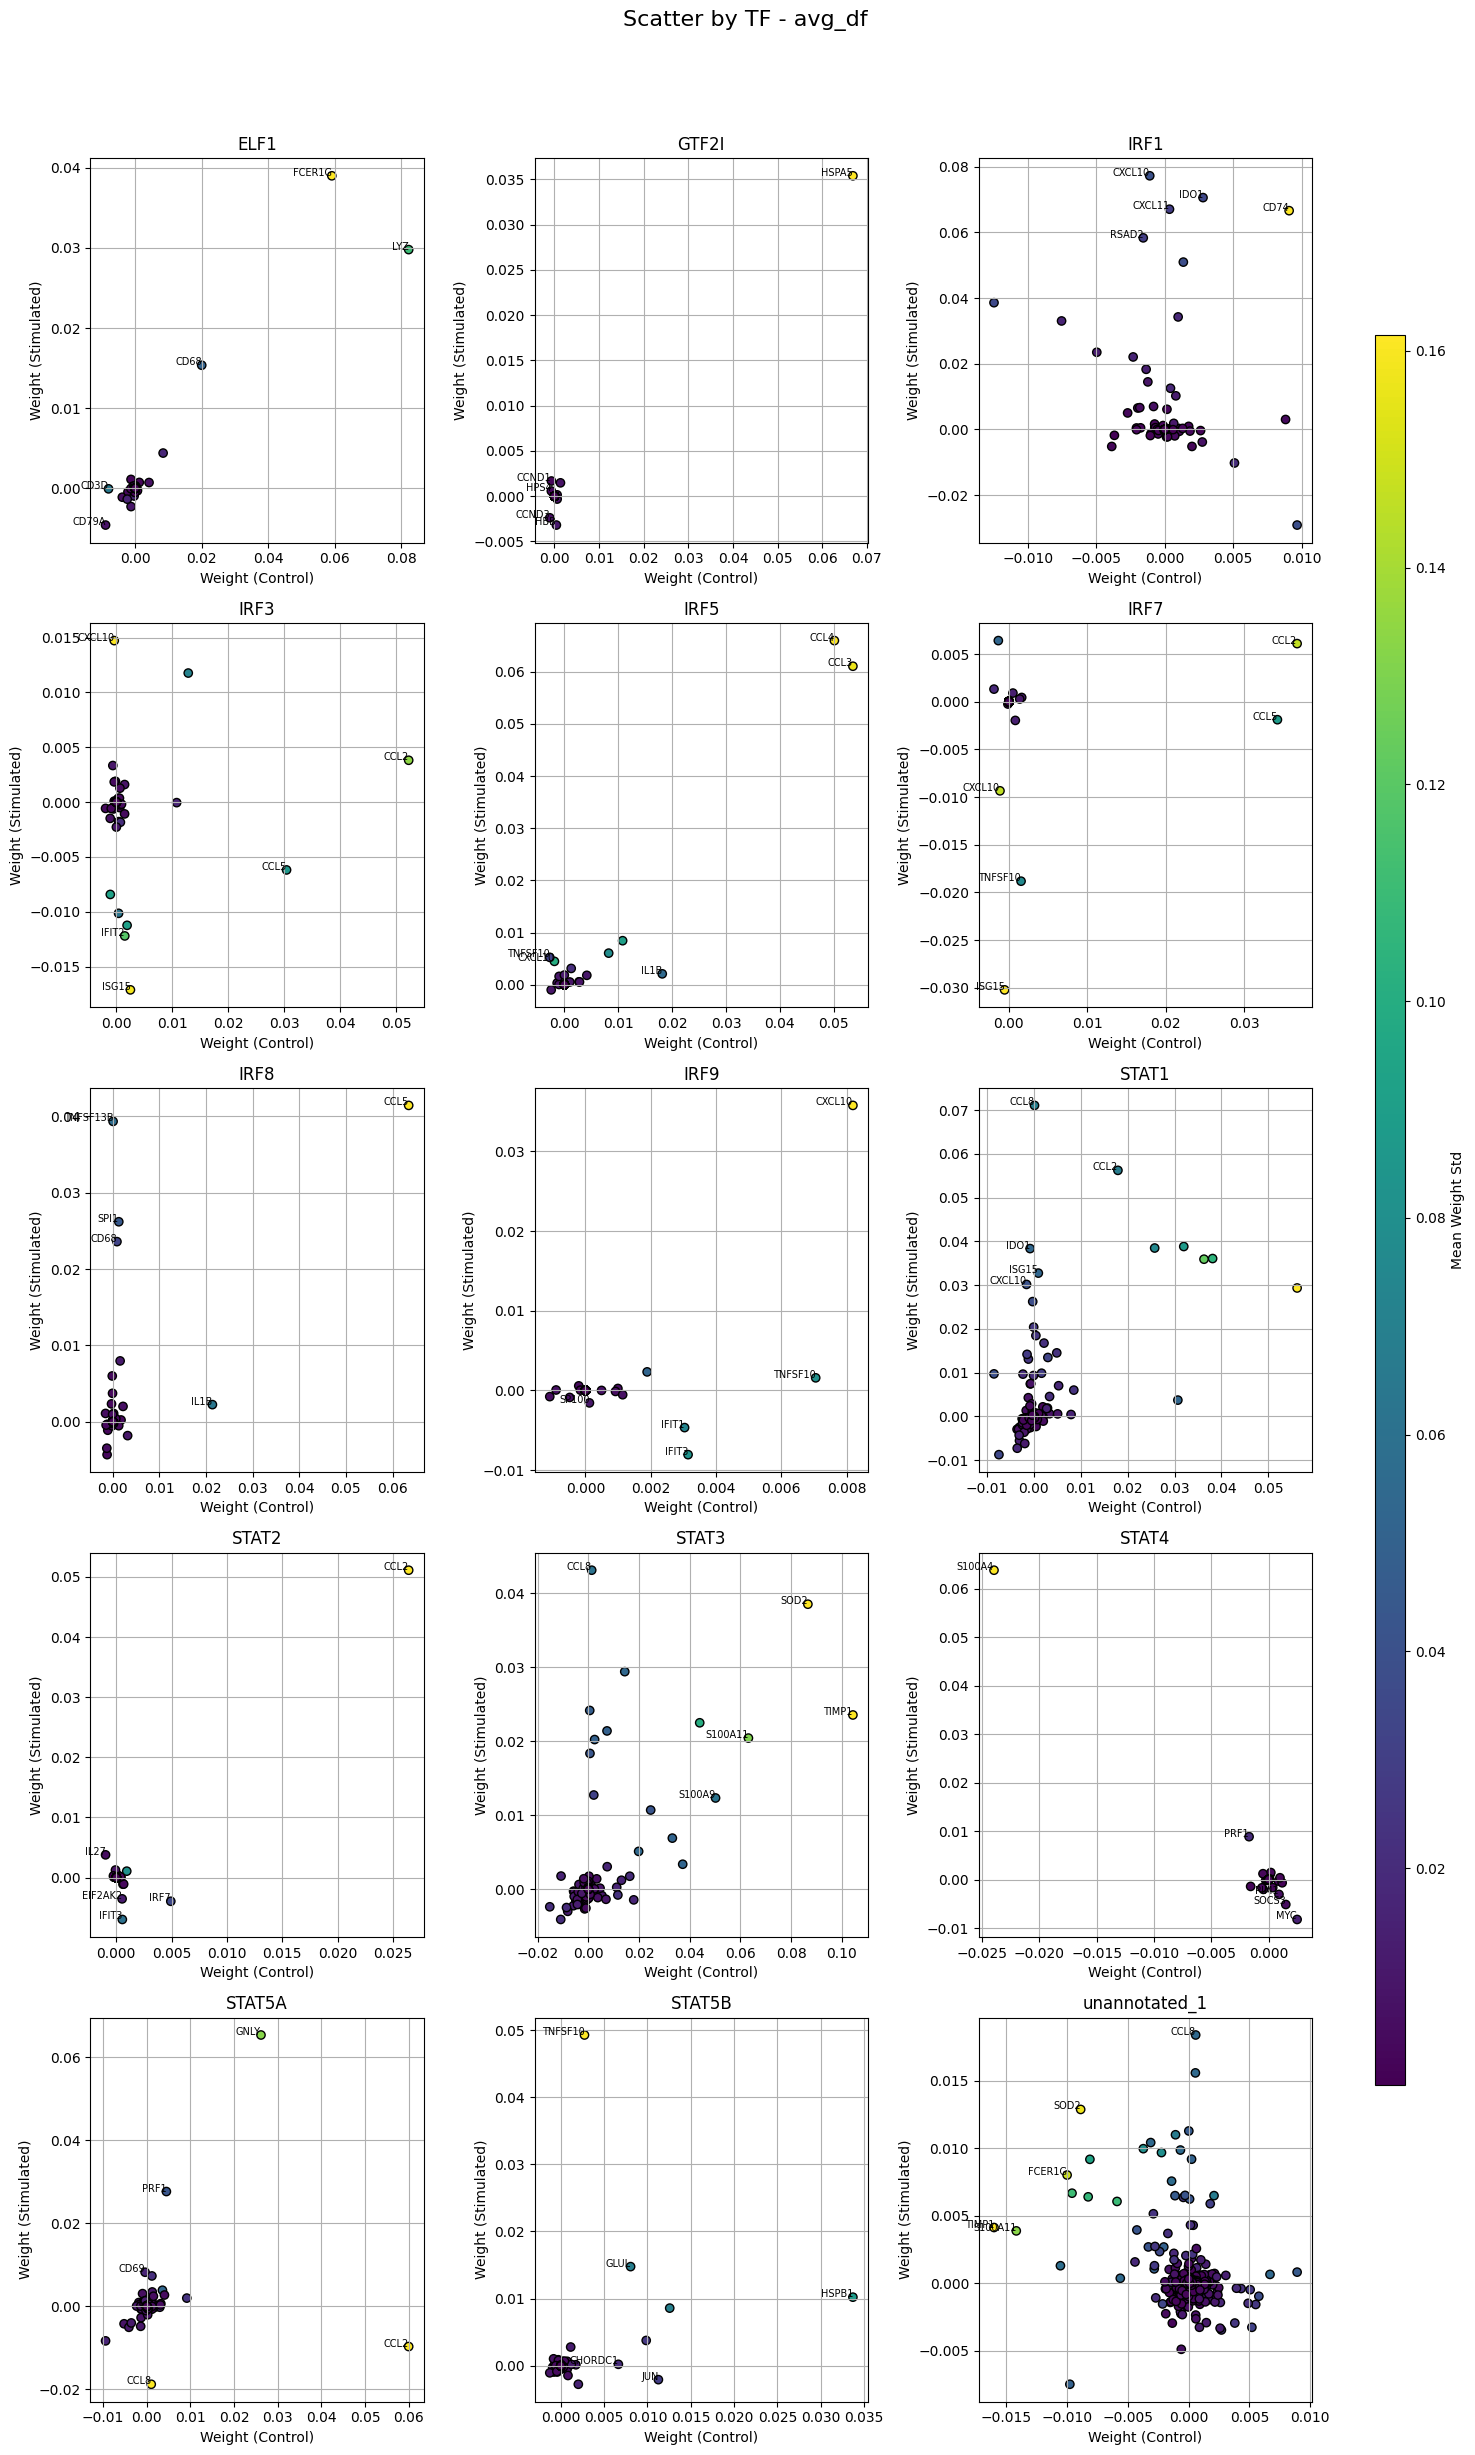

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

TOP_N = 5
genes_changing_up = []

genes_changing_down = []

df_dict = {
    'avg_df': avg_df,
    #'avg_df_swa': avg_df_swa,
    #'avg_df_david': avg_df_david
}

for name, df in df_dict.items():
    per_df_genes_up = []
    per_df_genes_down = []
    # Pivot table
    pivot_df = df.pivot_table(
        index=['tf', 'gene'],
        columns='cond',
        values=['wei', 'wei_std']
    ).reset_index()

    # Flatten columns
    pivot_df.columns = [
        'tf', 'gene',
        'wei_control', 'wei_stimulated',
        'wei_std_control', 'wei_std_stimulated'
    ]
    pivot_df['diff'] = pivot_df['wei_stimulated'] - pivot_df['wei_control']
    pivot_df['mean_std'] = (pivot_df['wei_std_control'] + pivot_df['wei_std_stimulated']) / 2

    # Subplots for each TF
    unique_tfs = pivot_df['tf'].unique()
    n_tfs = len(unique_tfs)
    ncols = 3
    nrows = math.ceil(n_tfs / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows), sharex=False, sharey=False)
    fig.suptitle(f'Scatter by TF - {name}', fontsize=16)
    axes = axes.flatten()

    for idx, tf_name in enumerate(unique_tfs):
        ax = axes[idx]
        group = pivot_df[pivot_df['tf'] == tf_name]

        sc = ax.scatter(
            group['wei_control'],
            group['wei_stimulated'],
            c=group['mean_std'],
            cmap='viridis',
            edgecolor='k'
        )

        # Etichetta i top N geni con maggiore differenza
        top_genes = group.loc[group['diff'].abs().nlargest(TOP_N).index]

        for _, row in top_genes.iterrows():
          if tf_name != "unannotated_1":
            if tf_name != "SP1":
              gene = row["gene"]
              diff = row["diff"]

              if diff > 0:
                  per_df_genes_up.append(gene)
              elif diff < 0:
                  per_df_genes_down.append(gene)
          ax.text(
                row['wei_control'],
                row['wei_stimulated'],
                row['gene'],
                fontsize=7,
                ha='right'
            )

        ax.set_title(tf_name)
        ax.set_xlabel('Weight (Control)')
        ax.set_ylabel('Weight (Stimulated)')
        ax.grid(True)
    genes_changing_up.append(per_df_genes_up)
    genes_changing_down.append(per_df_genes_down)# Rimuovi subplot vuoti se ci sono
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    # Aggiungi colorbar globale
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(sc, cax=cbar_ax, label='Mean Weight Std')

    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.show()


In [29]:
!pip install gseapy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 8.1 MB/s eta 0:00:00


['CD3D', 'CD79A', 'CCND1', 'HPS4', 'CXCL10', 'IDO1', 'CXCL11', 'RSAD2', 'CD74', 'CXCL10', 'CCL4', 'TNFSF10', 'CCL3', 'CXCL10', 'TNFSF13B', 'SPI1', 'CD68', 'CXCL10', 'CCL8', 'IDO1', 'CCL2', 'ISG15', 'CXCL10', 'CCL2', 'IL27', 'CCL8', 'S100A4', 'PRF1', 'GNLY', 'PRF1', 'CD69', 'TNFSF10', 'GLUL']


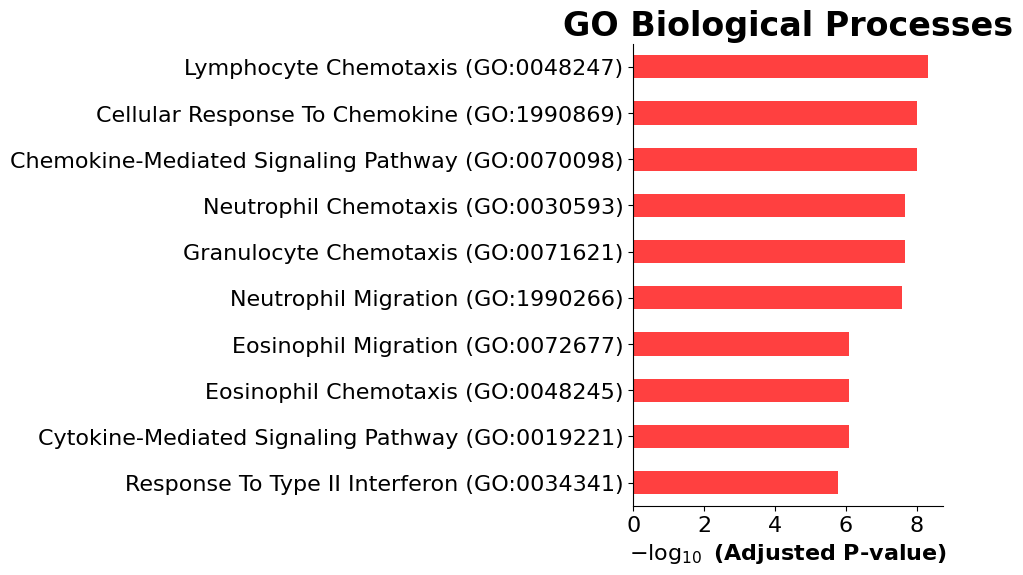

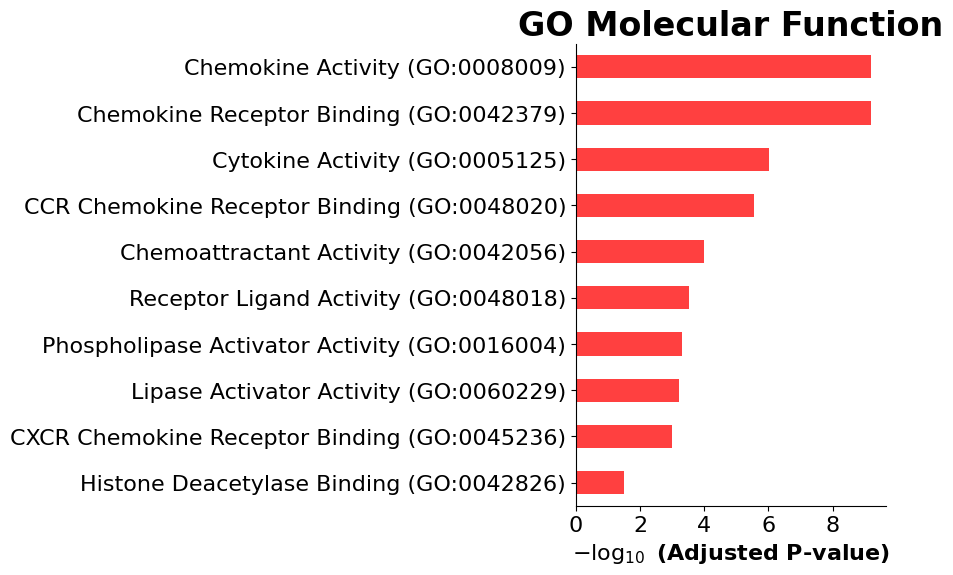

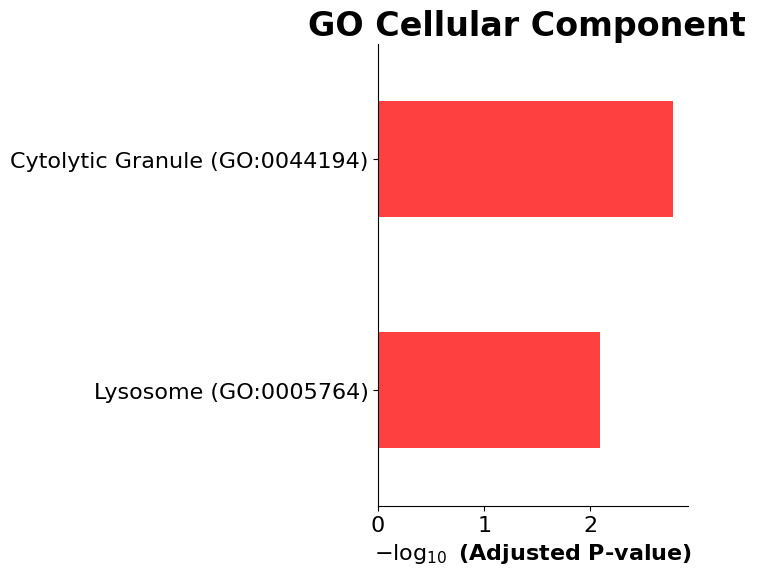

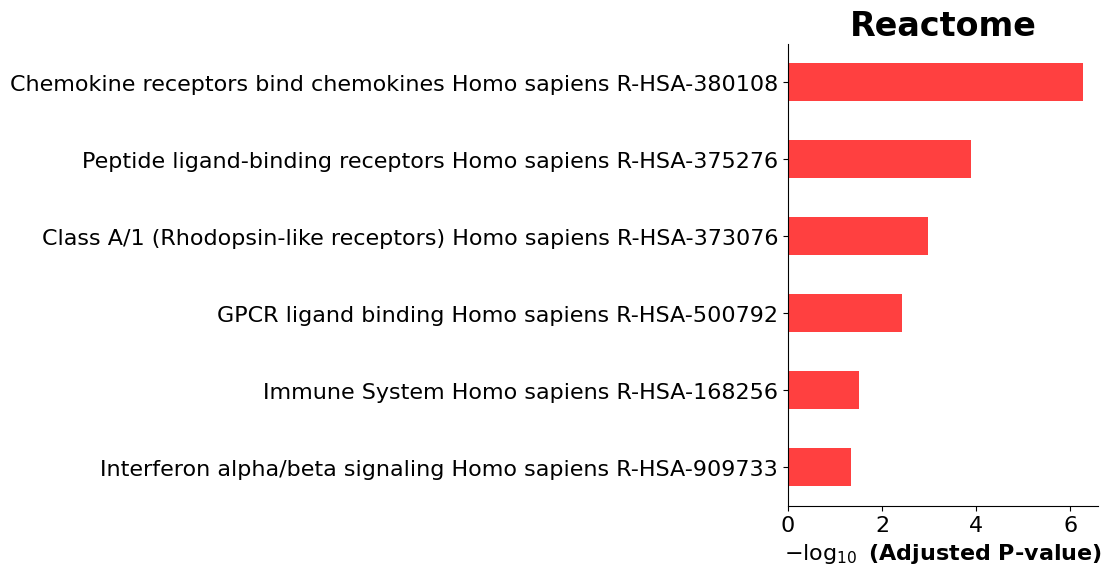

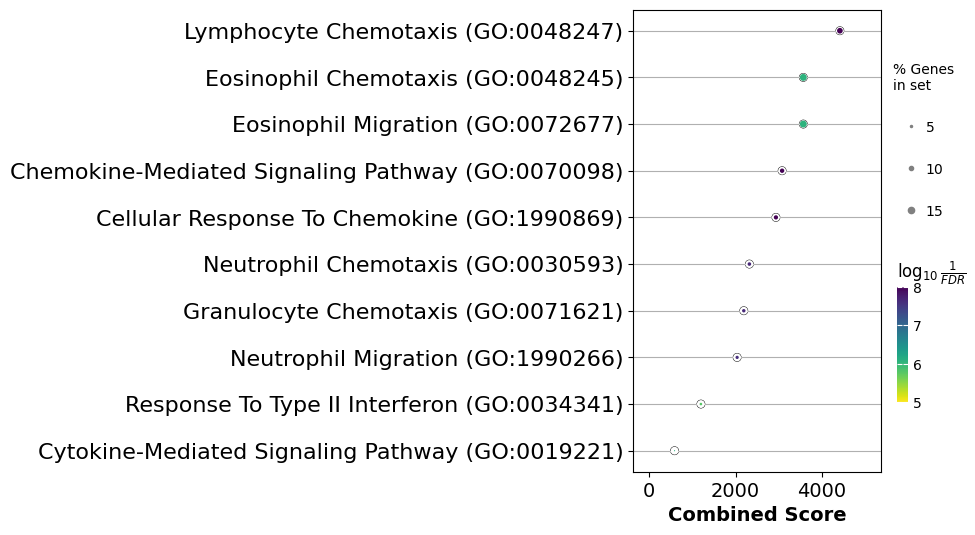

In [114]:
import gseapy
names = gseapy.get_library_name()
import gseapy as gp
import time
from gseapy.plot import barplot, dotplot

for genes in genes_changing_up:
  print(genes)
  genes=list(set(genes))
  time.sleep(5)

  enr_GOBP_up = gp.enrichr(gene_list=genes,
  gene_sets=['GO_Biological_Process_2023'],
  organism='Human',
  cutoff=0.5
  )
  time.sleep(2)

  enr_GOMF_up = gp.enrichr(gene_list=genes,
  gene_sets=['GO_Molecular_Function_2023'],
  organism='Human',
  cutoff=0.5
  )
  time.sleep(2)
  enr_GOCC_up = gp.enrichr(gene_list=genes,
  gene_sets=['GO_Cellular_Component_2023'],
  organism='Human',
  cutoff=0.5
  )
  time.sleep(2)
  enr_Reactome_up = gp.enrichr(gene_list=genes,
  gene_sets=['Reactome_2016'],
  organism='Human',
  cutoff=0.5
  )

  barplot(enr_GOBP_up.res2d,title='GO Biological Processes',color = 'r')
  barplot(enr_GOMF_up.res2d,title='GO Molecular Function',color = 'r')
  barplot(enr_GOCC_up.res2d,title='GO Cellular Component ',color = 'r')
  barplot(enr_Reactome_up.res2d,title='Reactome',color = 'r')
  ax = dotplot(enr_GOBP_up.res2d,
                # rotate xtick labels
                show_ring=True, # set to False to revmove outer ring
                marker='o',
              )

the genes which have the biggest difference for each TF all together

['IRF7', 'LYZ', 'S100A9', 'HBB', 'SP100', 'TIMP1', 'S100A11', 'CCL8', 'CCND3', 'TNFSF10', 'IFIT3', 'CHORDC1', 'IFIT2', 'IL1B', 'HSPA5', 'FCER1G', 'JUN', 'MYC', 'PIM1', 'ISG15', 'IFIT1', 'SOCS3', 'CCL5', 'CCL2', 'CD68', 'CXCL10', 'EIF2AK2', 'SOD2', 'HSPB1']


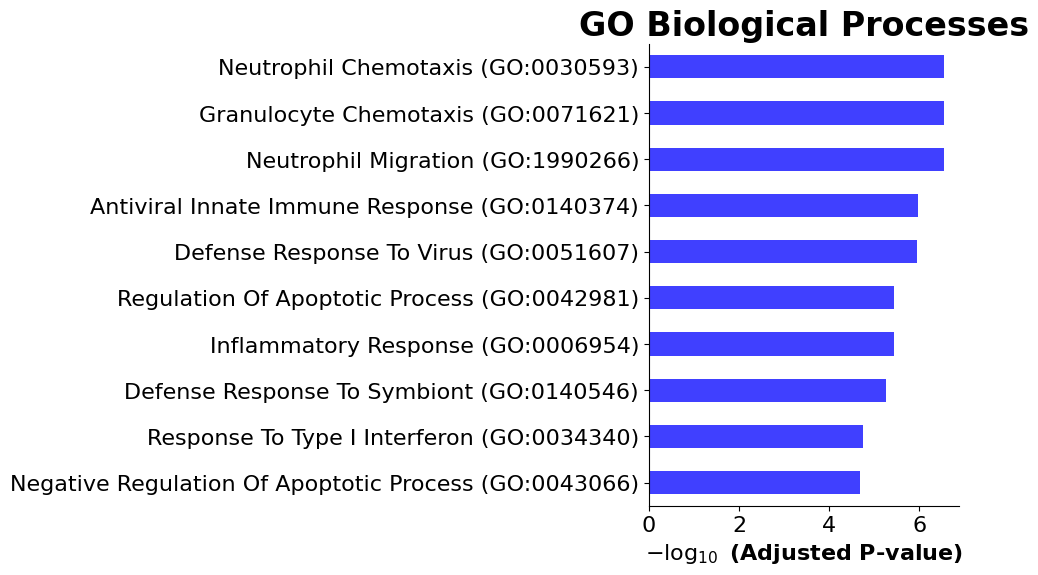

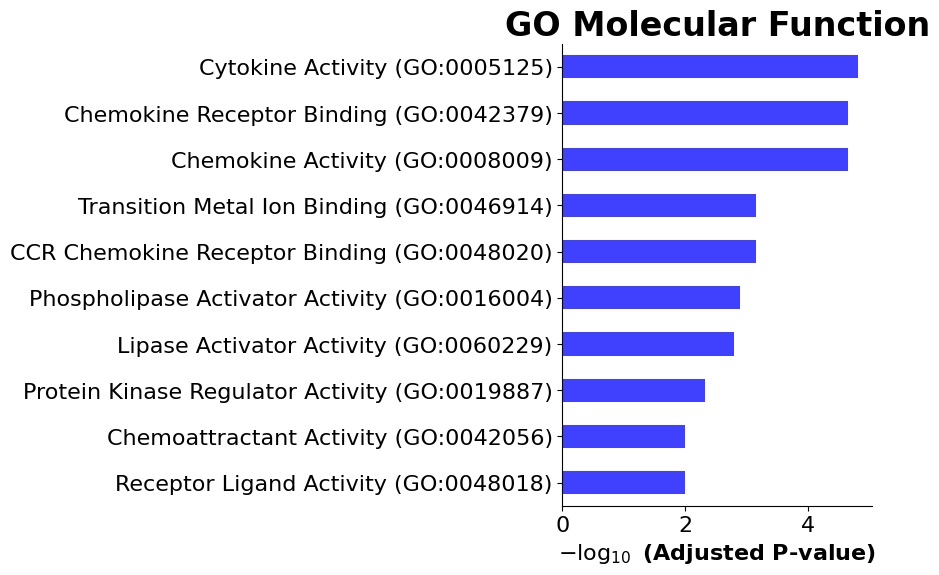

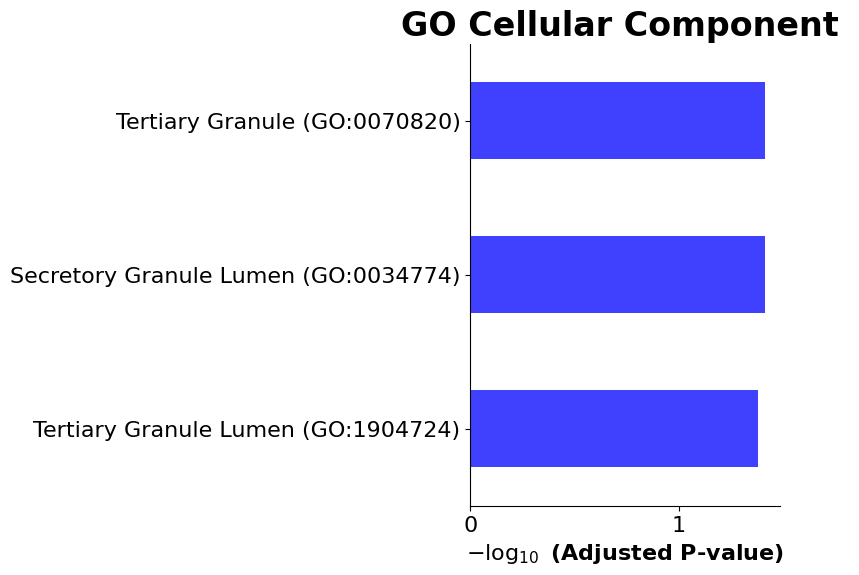

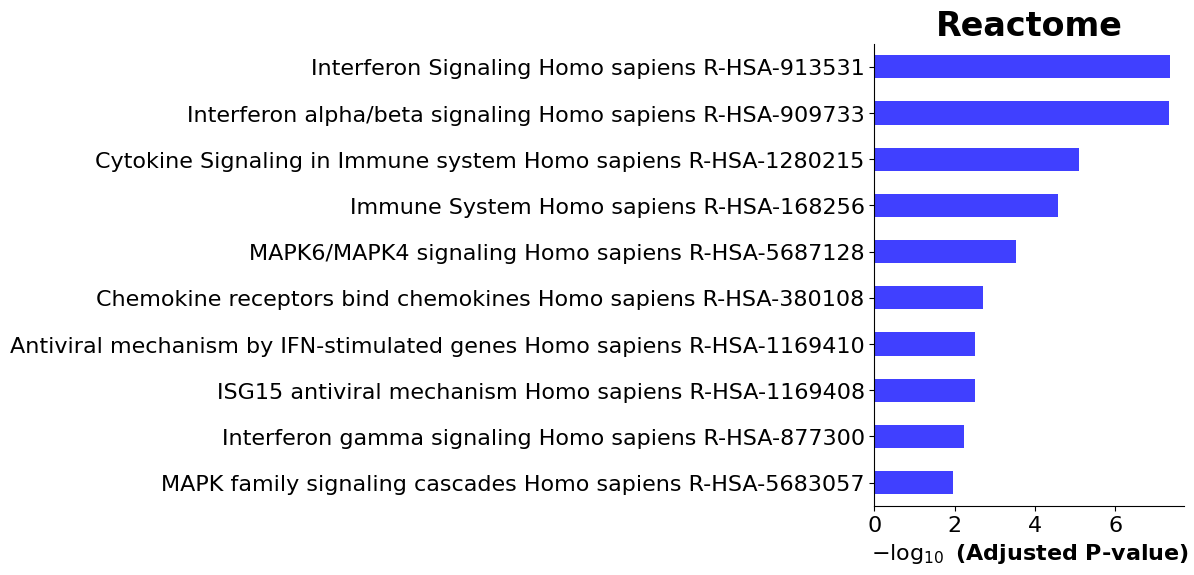

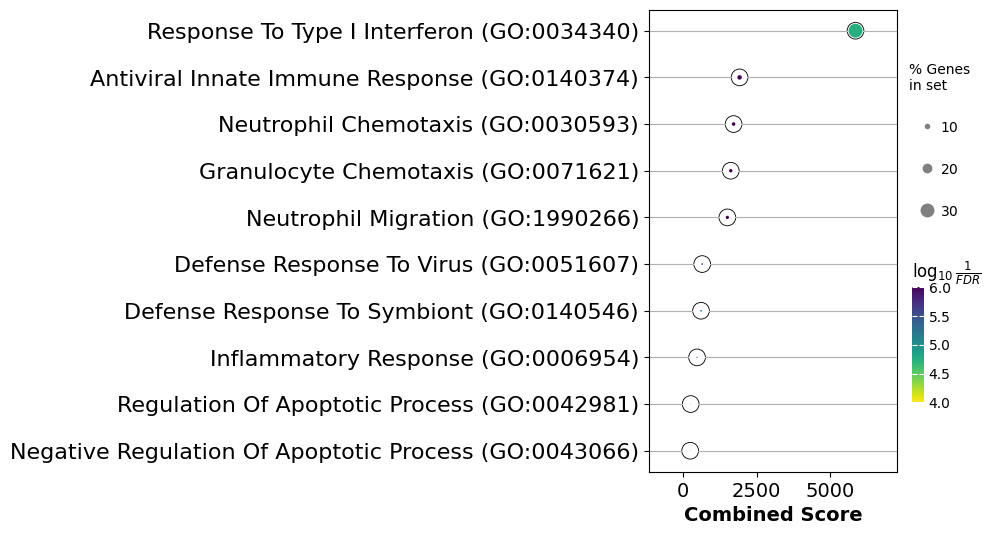

In [113]:
for genes in genes_changing_down:
  genes=list(set(genes))
  print(genes)
  time.sleep(5)

  enr_GOBP_up = gp.enrichr(gene_list=genes,
  gene_sets=['GO_Biological_Process_2023'],
  organism='Human',
  cutoff=0.5
  )
  time.sleep(2)

  enr_GOMF_up = gp.enrichr(gene_list=genes,
  gene_sets=['GO_Molecular_Function_2023'],
  organism='Human',
  cutoff=0.5
  )
  time.sleep(2)
  enr_GOCC_up = gp.enrichr(gene_list=genes,
  gene_sets=['GO_Cellular_Component_2023'],
  organism='Human',
  cutoff=0.5
  )
  time.sleep(2)
  enr_Reactome_up = gp.enrichr(gene_list=genes,
  gene_sets=['Reactome_2016'],
  organism='Human',
  cutoff=0.5
  )

  barplot(enr_GOBP_up.res2d,title='GO Biological Processes',color = 'b')
  barplot(enr_GOMF_up.res2d,title='GO Molecular Function',color = 'b')
  barplot(enr_GOCC_up.res2d,title='GO Cellular Component ',color = 'b')
  barplot(enr_Reactome_up.res2d,title='Reactome',color = 'b')
  ax = dotplot(enr_GOBP_up.res2d,
                # rotate xtick labels
                show_ring=True, # set to False to revmove outer ring
                marker='o',
              )

# WEIGHTS

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

In [32]:
normal=pd.read_csv("/content/drive/MyDrive/vega_weights_cleaned.csv", sep = "\t")
SWA = pd.read_csv("/content/drive/MyDrive/vega_weights_SWA.csv", sep = "\t")
david=pd.read_csv("/content/drive/MyDrive/weights_control_stimulated.csv", sep = ";")
avg_df_normal=averagingdf(normal)
avg_df_swa=averagingdf(SWA)
pivot_df_normal = avg_df_normal.pivot_table(
    index=['tf', 'gene'],
    columns='cond',
    values=['wei', 'wei_std']
).reset_index()

# Flatten the column names
pivot_df_normal.columns = ['tf', 'gene', 'wei_control_normal', 'wei_stimulated_normal', 'wei_std_control_normal', 'wei_std_stimulated_normal']
pivot_df_swa = avg_df_swa.pivot_table(
    index=['tf', 'gene'],
    columns='cond',
    values=['wei', 'wei_std']
).reset_index()

# Flatten the column names
pivot_df_swa.columns = ['tf', 'gene', 'wei_control_swa', 'wei_stimulated_swa', 'wei_std_control_swa', 'wei_std_stimulated_swa']

In [33]:
david=david.drop(columns=["iteration"])


In [34]:
david.columns=['tf', 'gene', 'wei_control_david', 'wei_stimulated_david', 'wei_std_control_david', 'wei_std_stimulated_david']

In [35]:
union=pd.merge(on=["tf","gene"],left=pivot_df_normal,right=pivot_df_swa)
union=pd.merge(on=["tf","gene"],left=union,right=david)

In [ ]:
union

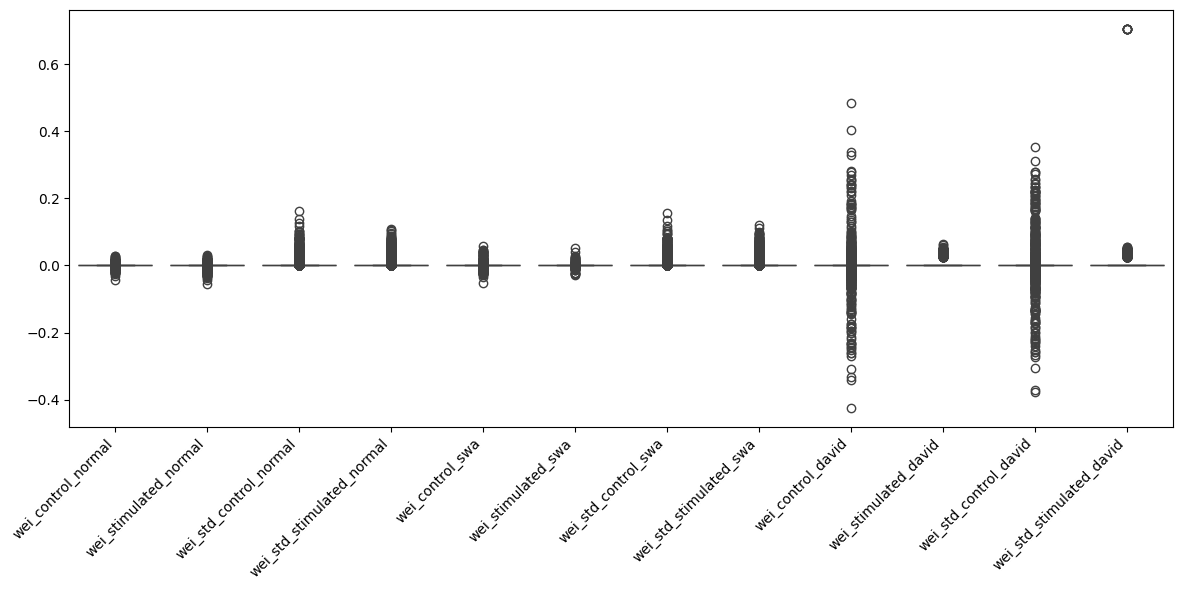

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=union)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
union.iloc[:,2:]

In [37]:
union.columns
sd_stim=[
        'wei_std_stimulated_normal',
       'wei_std_stimulated_swa',
       'wei_std_stimulated_david']
sd_control =['wei_std_control_normal','wei_std_control_swa','wei_std_control_david',]
weights_control=[
       'wei_control_normal',
        'wei_control_swa',

       'wei_control_david']
weights_stim= ['wei_stimulated_normal','wei_stimulated_swa','wei_stimulated_david']

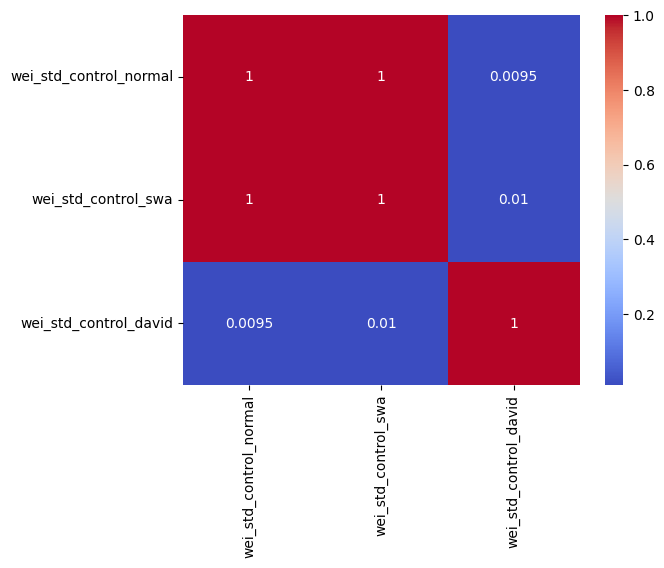

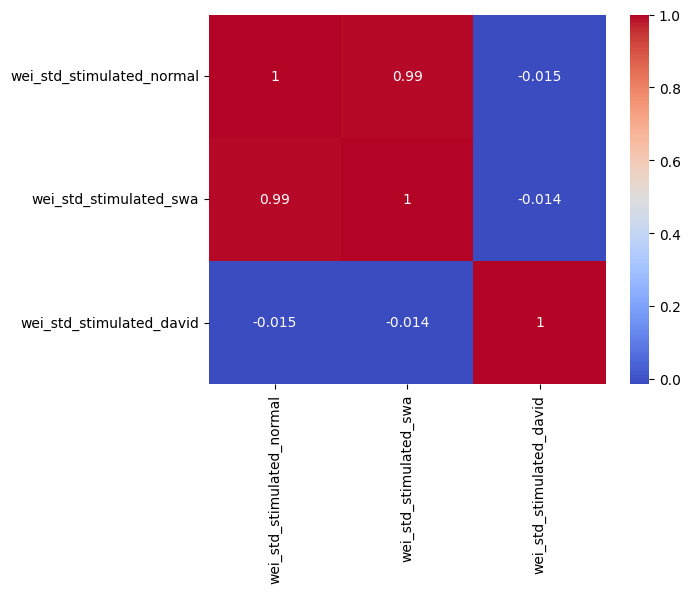

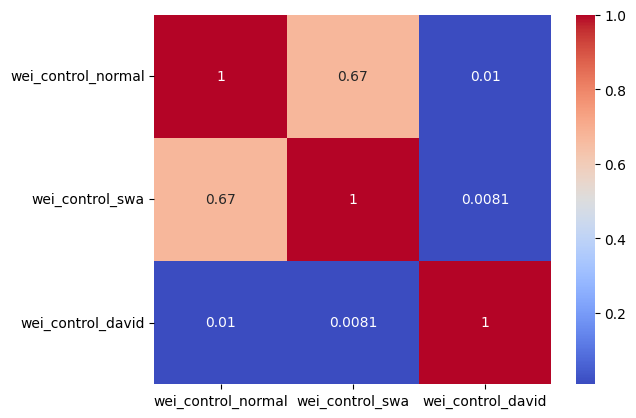

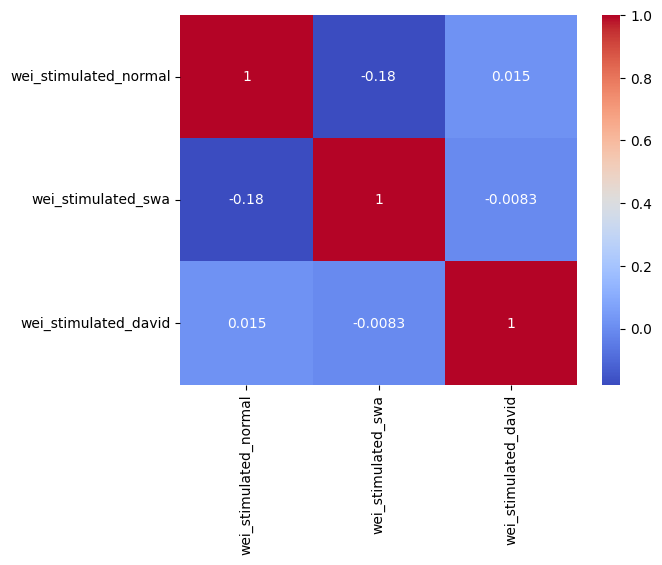

In [38]:
for subgroup in [sd_control,sd_stim,weights_control,weights_stim]:

  sns.heatmap(union[subgroup].corr(), annot=True, cmap='coolwarm')
  plt.show()

In [39]:
# 2. Calcola la differenza stimolato - controllo per ogni condizione
df=union.copy()
df['diff_normal'] = df['wei_stimulated_normal'] - df['wei_control_normal']
df['diff_swa'] = df['wei_stimulated_swa'] - df['wei_control_swa']
df['diff_david'] = df['wei_stimulated_david'] - df['wei_control_david']

# 3. Calcola la media assoluta dell'effetto (quanto è forte la differenza)
mean_effect_normal = df['diff_normal'].abs().mean()
mean_effect_swa = df['diff_swa'].abs().mean()
mean_effect_david = df['diff_david'].abs().mean()

# 4. Calcola la deviazione standard media (quanto è stabile)
std_normal = ((df['wei_std_control_normal']**2 + df['wei_std_stimulated_normal']**2) / 2).mean()
std_swa = ((df['wei_std_control_swa']**2 + df['wei_std_stimulated_swa']**2) / 2).mean()
std_david = ((df['wei_std_control_david']**2 + df['wei_std_stimulated_david']**2) / 2).mean()

# 5. Calcola il rapporto segnale-rumore (SNR: più alto = meglio)
snr_normal = mean_effect_normal / std_normal if std_normal != 0 else 0
snr_swa = mean_effect_swa / std_swa if std_swa != 0 else 0
snr_david = mean_effect_david / std_david if std_david != 0 else 0

# 6. Stampa i risultati
print("== Risultati ==")
print(f"Normal -> Effetto medio: {mean_effect_normal:.6f}, STD media: {std_normal:.6f}, SNR: {snr_normal:.2f}")
print(f"SWA    -> Effetto medio: {mean_effect_swa:.6f}, STD media: {std_swa:.6f}, SNR: {snr_swa:.2f}")
print(f"David  -> Effetto medio: {mean_effect_david:.6f}, STD media: {std_david:.6f}, SNR: {snr_david:.2f}")

# 7. Determina il migliore
best = max(
    [("normal", snr_normal), ("swa", snr_swa), ("david", snr_david)],
    key=lambda x: x[1]
)
print(f"\n🏆 Il training migliore è: {best[0].upper()} (SNR = {best[1]:.2f})")

== Risultati ==
Normal -> Effetto medio: 0.000269, STD media: 0.000040, SNR: 6.70
SWA    -> Effetto medio: 0.000364, STD media: 0.000040, SNR: 9.14
David  -> Effetto medio: 0.006513, STD media: 0.000455, SNR: 14.31

🏆 Il training migliore è: DAVID (SNR = 14.31)


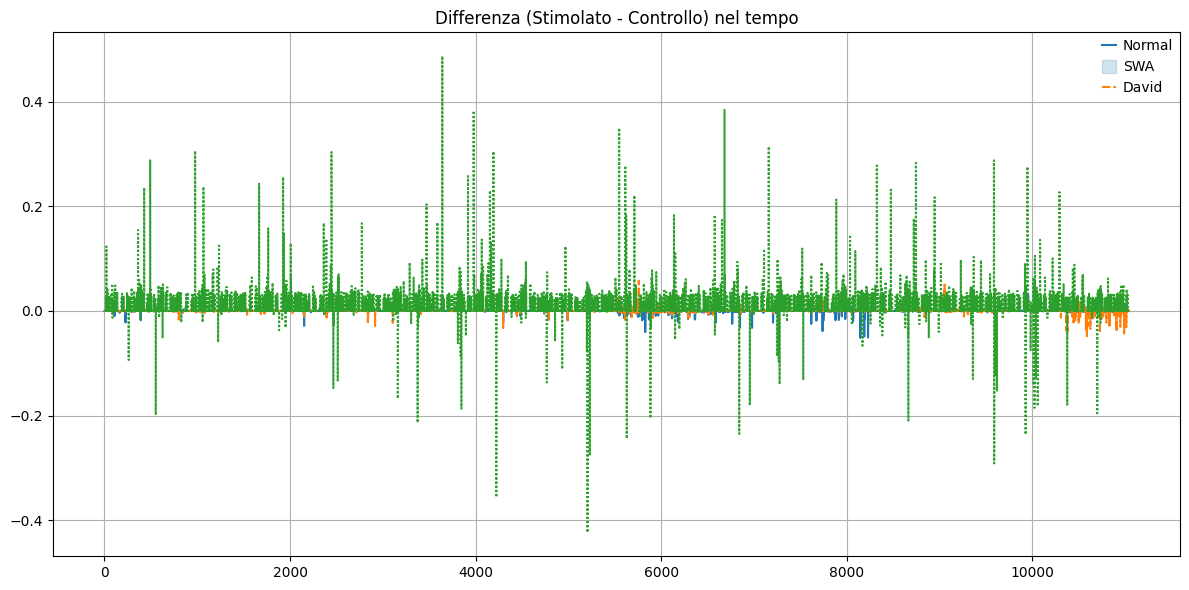

<ipython-input-40-009cabbfa72e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(snr.keys()), y=list(snr.values()), palette="viridis")
<ipython-input-40-009cabbfa72e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mean_effect.keys()), y=list(mean_effect.values()), palette="mako")


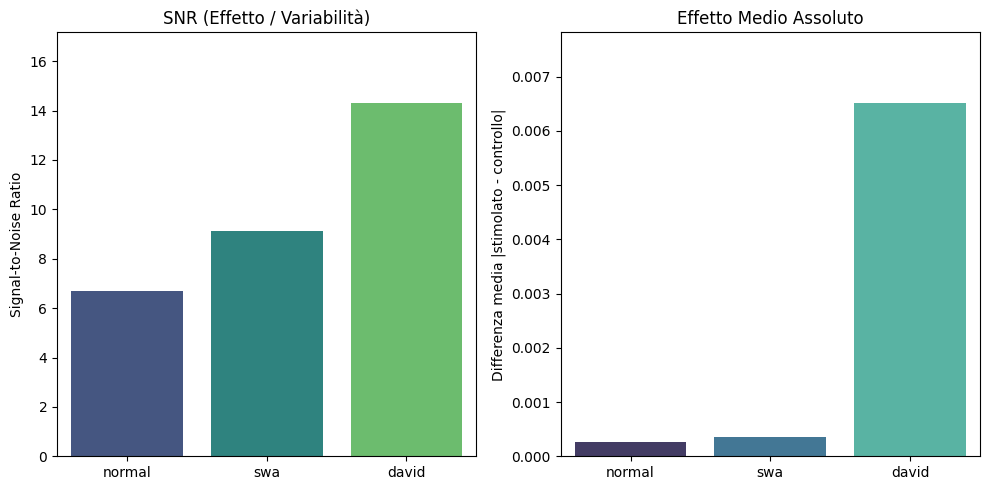

In [40]:
# 3. Calcolo delle metriche
mean_effect = {
    "normal": df['diff_normal'].abs().mean(),
    "swa": df['diff_swa'].abs().mean(),
    "david": df['diff_david'].abs().mean()
}

std_effect = {
    "normal": ((df['wei_std_control_normal']**2 + df['wei_std_stimulated_normal']**2) / 2).mean(),
    "swa": ((df['wei_std_control_swa']**2 + df['wei_std_stimulated_swa']**2) / 2).mean(),
    "david": ((df['wei_std_control_david']**2 + df['wei_std_stimulated_david']**2) / 2).mean()
}

snr = {
    key: mean_effect[key] / std_effect[key] if std_effect[key] != 0 else 0
    for key in mean_effect
}

# 4. Plot: andamento differenze nel tempo
plt.figure(figsize=(12, 6))

sns.lineplot(data=df[['diff_normal', 'diff_swa', 'diff_david']])
plt.title("Differenza (Stimolato - Controllo) nel tempo")
plt.legend(["Normal", "SWA", "David"])
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Plot: confronto tra condizioni (barplot)
plt.figure(figsize=(10, 5))

# SNR barplot
plt.subplot(1, 2, 1)
sns.barplot(x=list(snr.keys()), y=list(snr.values()), palette="viridis")
plt.title("SNR (Effetto / Variabilità)")
plt.ylabel("Signal-to-Noise Ratio")
plt.ylim(0, max(snr.values()) * 1.2)

# Media assoluta effetto
plt.subplot(1, 2, 2)
sns.barplot(x=list(mean_effect.keys()), y=list(mean_effect.values()), palette="mako")
plt.title("Effetto Medio Assoluto")
plt.ylabel("Differenza media |stimolato - controllo|")
plt.ylim(0, max(mean_effect.values()) * 1.2)

plt.tight_layout()
plt.show()